In [1]:
# Importing the necessary libraries
# All the libraries that are needed to run this Python file are imported to this cell
import numpy as np
import pandas as pd
from tabulate import tabulate
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so   # "objects" is a submodule within seaborn, the shorthand name for it is so
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  # To perform the KNN algorithm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, silhouette_score  # These functions from sklearn.metrics are used for evaluating the performance of the machine learning model 
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.feature_selection import RFE, VarianceThreshold, SelectKBest, f_classif
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For scaling the data & to perform one-hot encoding
# Part of the last lecture
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [2]:
# Reading the .csv file that is labelled as "hepatitis.csv" into Pandas data frame  with the name df
df = pd.read_csv("./Data/hepatitis.csv")

In [3]:
# Performing The Normal Checking (The first step that needs to be performed is the checking of the data)
# Displaying the first (5) rows of the data frame  
print("First few rows of the data frame :\n", df.head())  # Utilizing the .head() method to display the first 5 rows of the data frame 

# Checking data types
print("\nData types of each column:\n", df.dtypes)  # This line of code will return the data type for each of the columns in the data frame  

# Checking for missing values
print("\nNumber of missing values in each column:\n", df.isnull().sum())  # To identify the sum of all the null values within each of the columns of the data frame  

# Getting summary statistics
print("\nSummary statistics for numerical columns:\n", df.describe()) # To get a descriptive statistics of the data frame  

# Checking for duplicates
print("\nNumber of duplicated rows:\n", df.duplicated().sum())  # To return the total sum of duplicated rows in the data frame 

# Check the shape of the data frame 
print("\nShape of the data frame  (rows, columns):\n", df.shape)  # Accessing the shape of the data frame , that is, the total number of rows and columns within the data frame 


First few rows of the data frame :
    age     sex steroid  antivirals fatigue malaise anorexia liver_big  \
0   30    male   False       False   False   False    False     False   
1   50  female   False       False    True   False    False     False   
2   78  female    True       False    True   False    False      True   
3   31  female     NaN        True   False   False    False      True   
4   34  female    True       False   False   False    False      True   

  liver_firm spleen_palpable spiders ascites varices  bilirubin  \
0      False           False   False   False   False        1.0   
1      False           False   False   False   False        0.9   
2      False           False   False   False   False        0.7   
3      False           False   False   False   False        0.7   
4      False           False   False   False   False        1.0   

   alk_phosphate   sgot  albumin  protime  histology class  
0           85.0   18.0      4.0      NaN      False  live  


In [4]:
# Accessing the specific columns of the data frame 
df.columns  # Returns a list of all the column headers in the data frame , to get a better idea of the data frame  

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

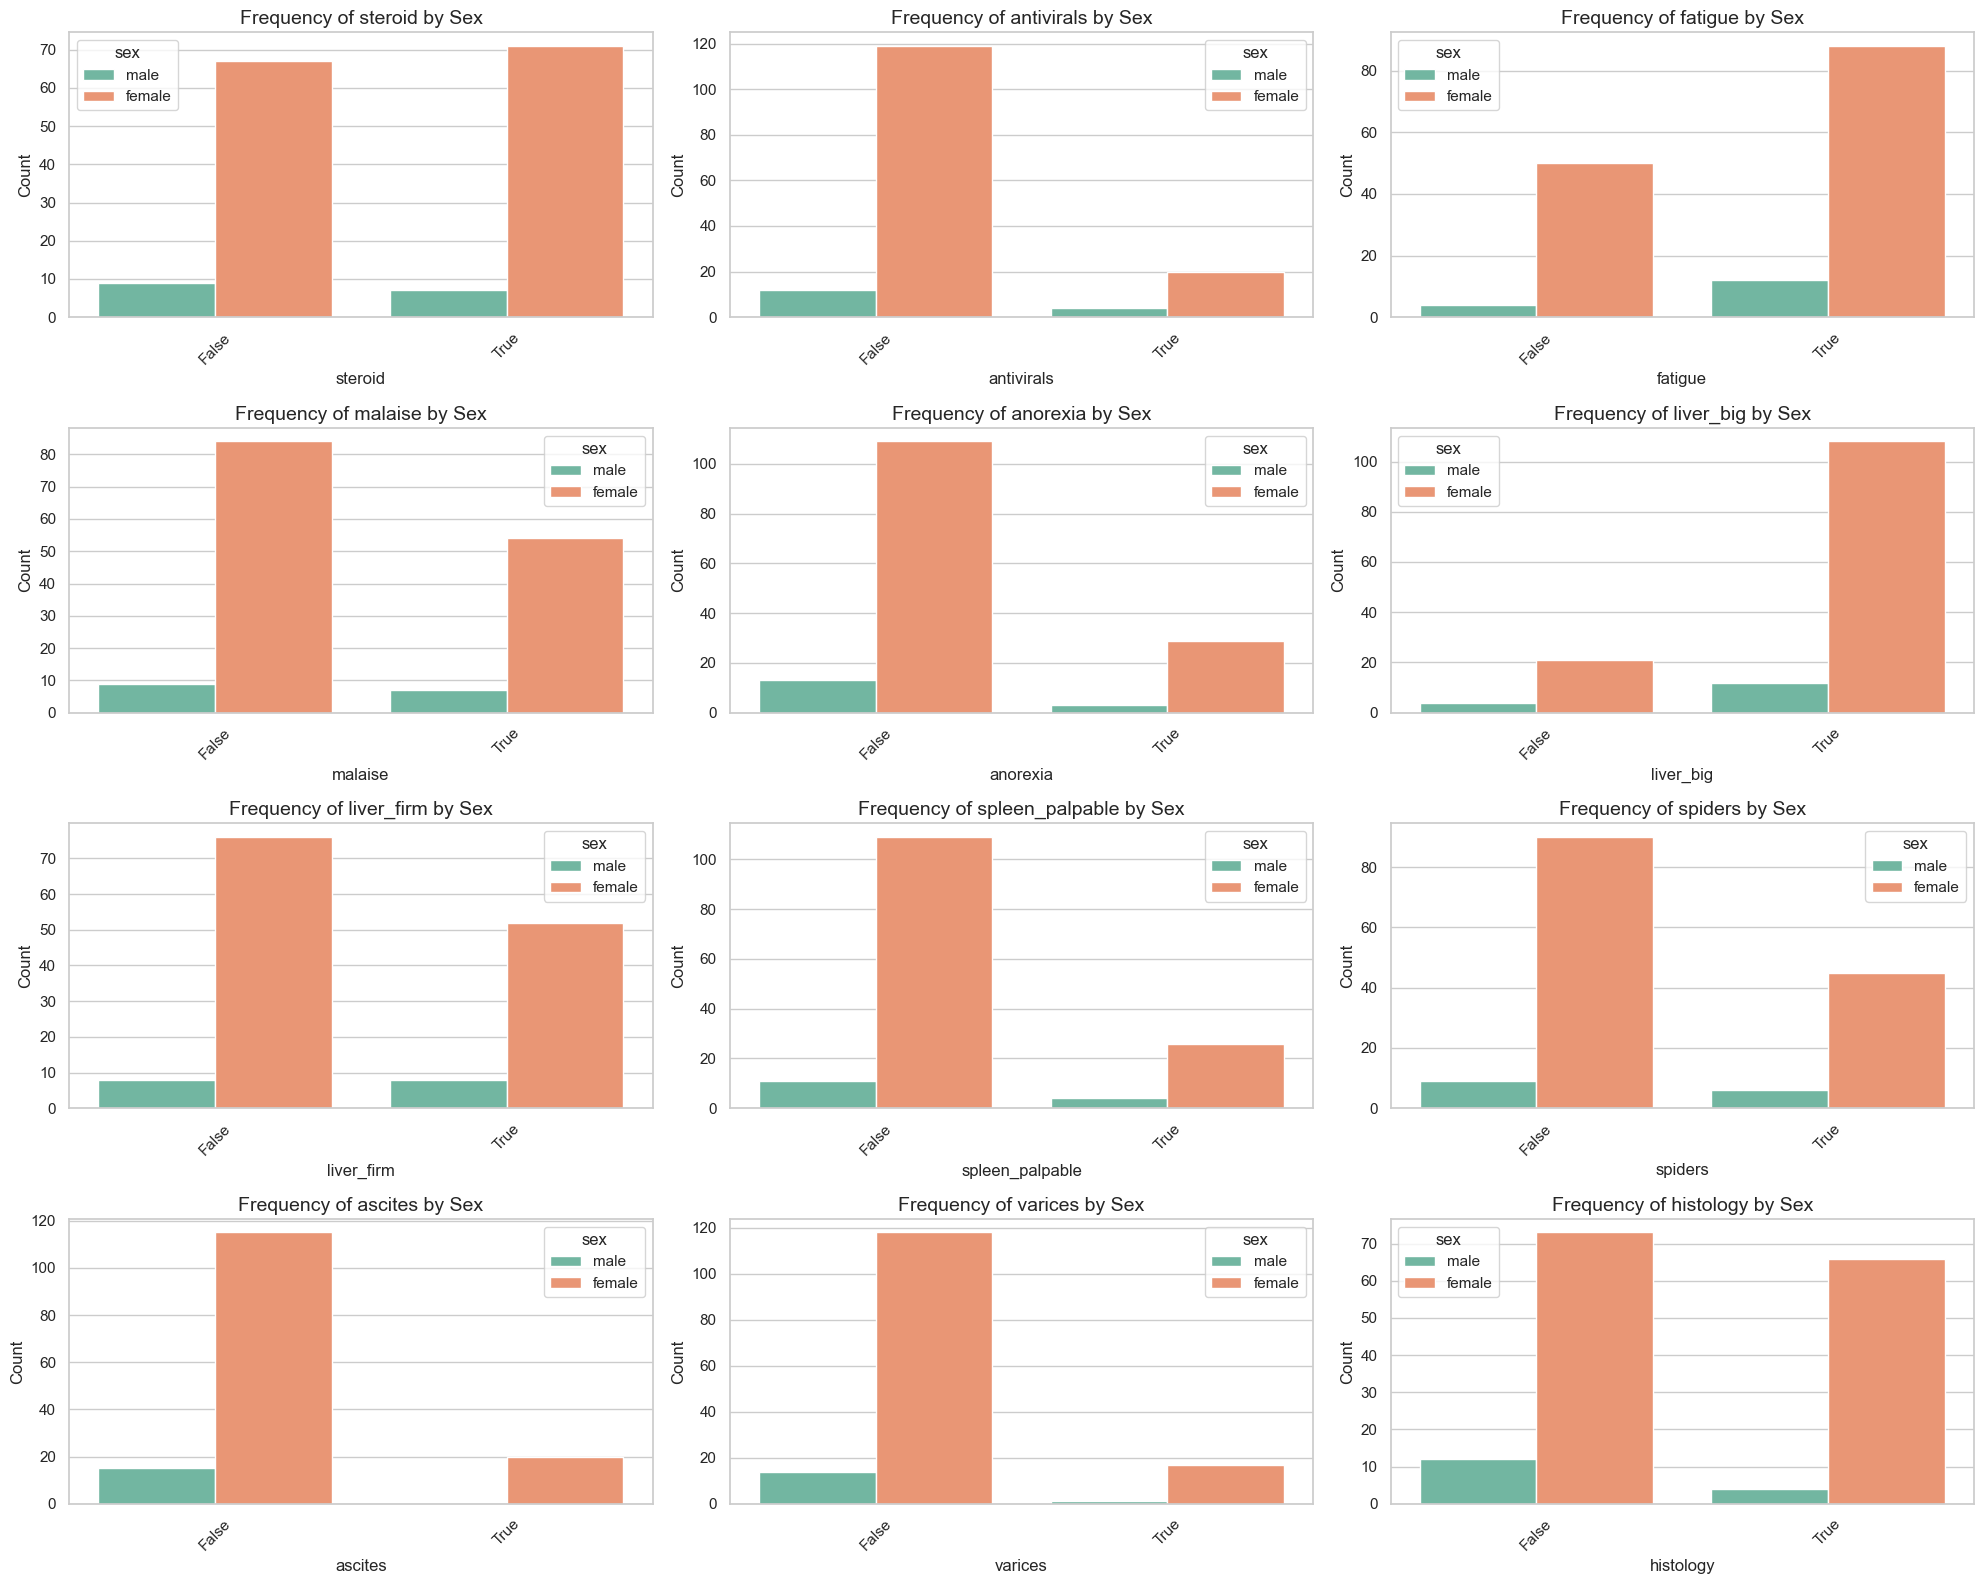

In [5]:
# Exploratory Visuals
# ------------------------------------------------------------ #
# Defining the categorical and numerical columns
cat_cols = ['steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
                    'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
                    'varices', 'histology']  # The 'sex' will be used as hue, so it is not added to this list 
num_cols = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']


# Set the visual appearance of Seaborn plots
sns.set(style="whitegrid", palette="pastel")  # Sets the background to a white grid using the style parameter and using a pastel colour palette as the pallet

# Adjusting the overall size of the figure
plt.figure(figsize=(20, 16))  # Creates a new figure with a pre-specified width (20) and height (16) in inches

# Looping over each categorical column to create sub-plots
for index, col in enumerate(cat_cols, 1):  # Enumerate through categorical_cols, and defining the starting index to be 1
    plt.subplot(4, 3, index)  # Creates a subplot in a 4x3 grid at the position specified by 'index'
    sns.countplot(x=col, hue='sex', data=df, palette="Set2")  # Creates a count plot for the column 'col' with hue set to 'sex', using a specific colour palette 
    plt.title(f'Frequency of {col} by Sex', fontsize=14)  # Sets the title of the subplot with the name of the column and a specific font size
    plt.xticks(rotation=45)  # Rotates the x-axis labels by 45 degrees for better readability
    plt.xlabel(col, fontsize=12)  # Sets the x-axis label as the name of the current column with a specific font size
    plt.ylabel('Count', fontsize=12)  # Sets the y-axis label to 'Count' with a specific font size

plt.tight_layout()  

# Save the figure
plt.savefig('./Results/Categorical_Frequency_by_Sex.png', dpi=300, bbox_inches='tight')
plt.show()  # Display the plot


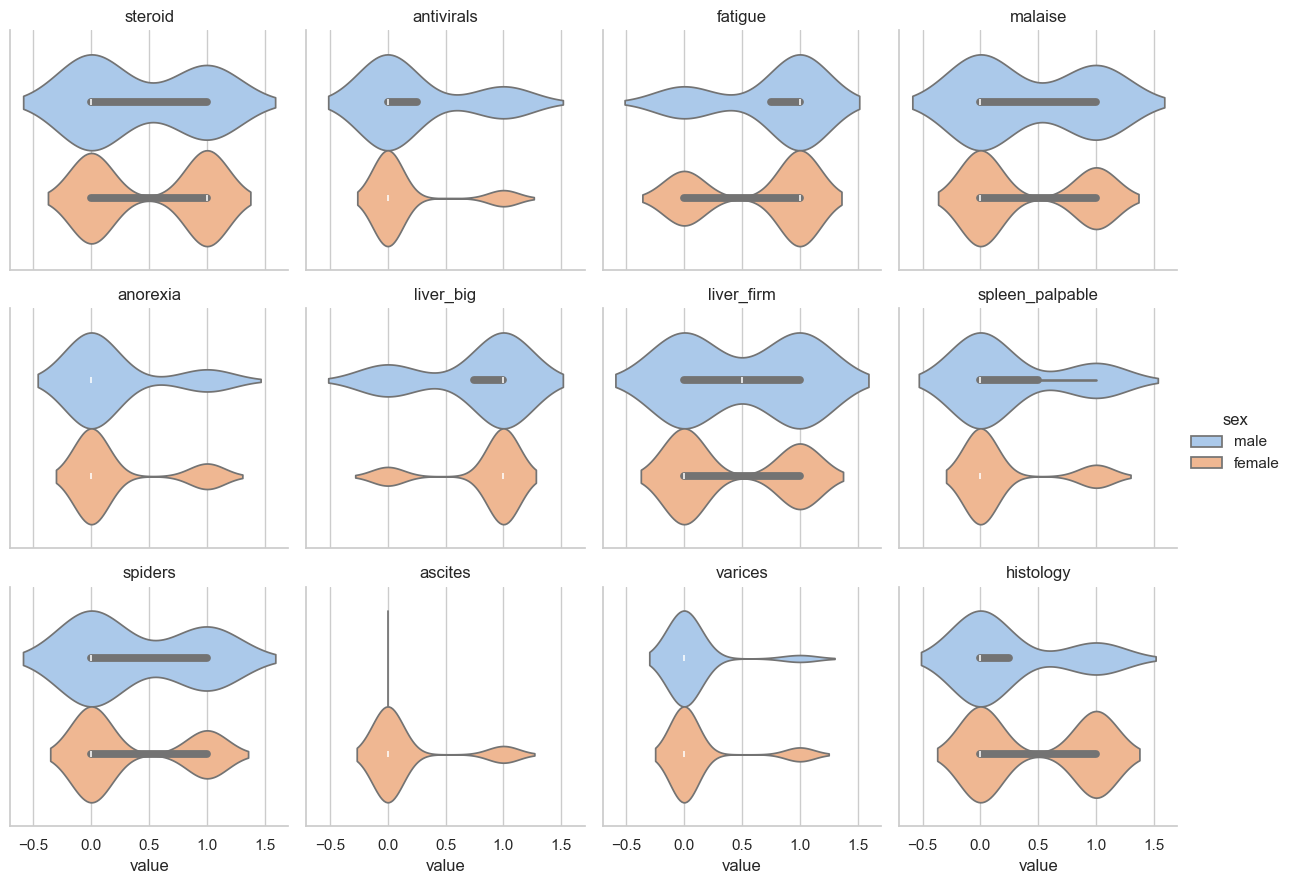

In [6]:
# Creating A Violin Plot using seaborn.catplot
# ------------------------------------------------------------ #
# First Step: Transforming the data frame  to a long format to be suitable for "FacetGrid"
long_df = df.melt(id_vars=['sex'], value_vars=cat_cols, var_name='variable', value_name='value')

# Use catplot to create a grid of count plots
plot = sns.catplot(x='value', 
                   col='variable', 
                   col_wrap=4, 
                   data=long_df, 
                   kind='violin',   # Here, the kind argument is used to define the kind of the plot that we want to add 
                   hue='sex', 
                   height=3, 
                   aspect=1)

# Set the titles for each of the subplots to be the column names
plot.set_titles("{col_name}")

# Save the figure
plot.savefig('./Results/Violin_Plots_by_Category_and_Sex.png', dpi=300, bbox_inches='tight')

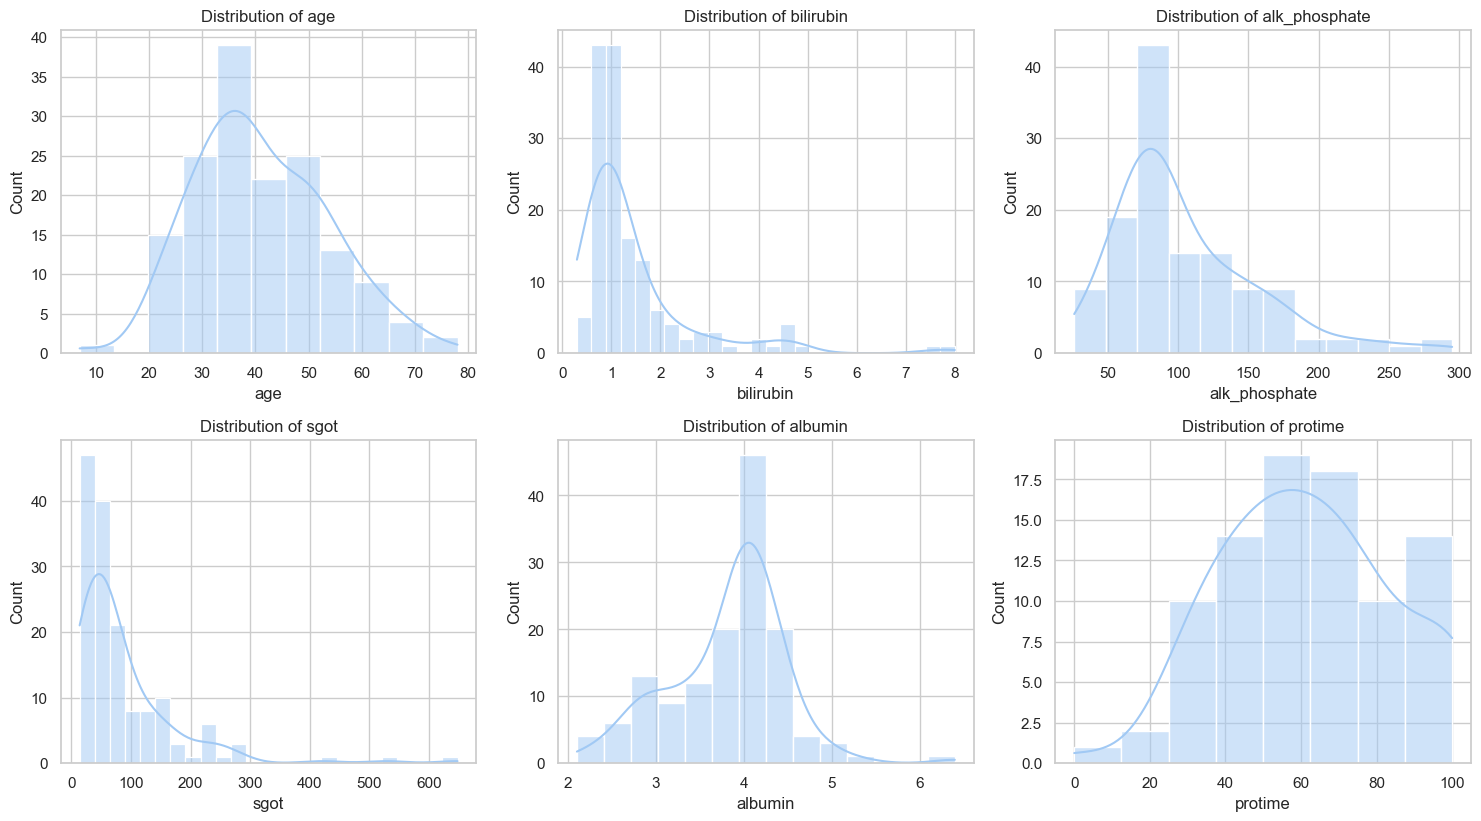

In [7]:
# Creating Histograms, One For Each Numerical Column 
# ------------------------------------------------------------ #
# Now, moving to the numerical data in the data frame , and trying to visualize them using a histogram
# Histograms Sub-Plots (Numerical Data)
plt.figure(figsize=(15, 12))
for index, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, index)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
# Save the figure 
plt.savefig('./Results/Numerical_Features_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()


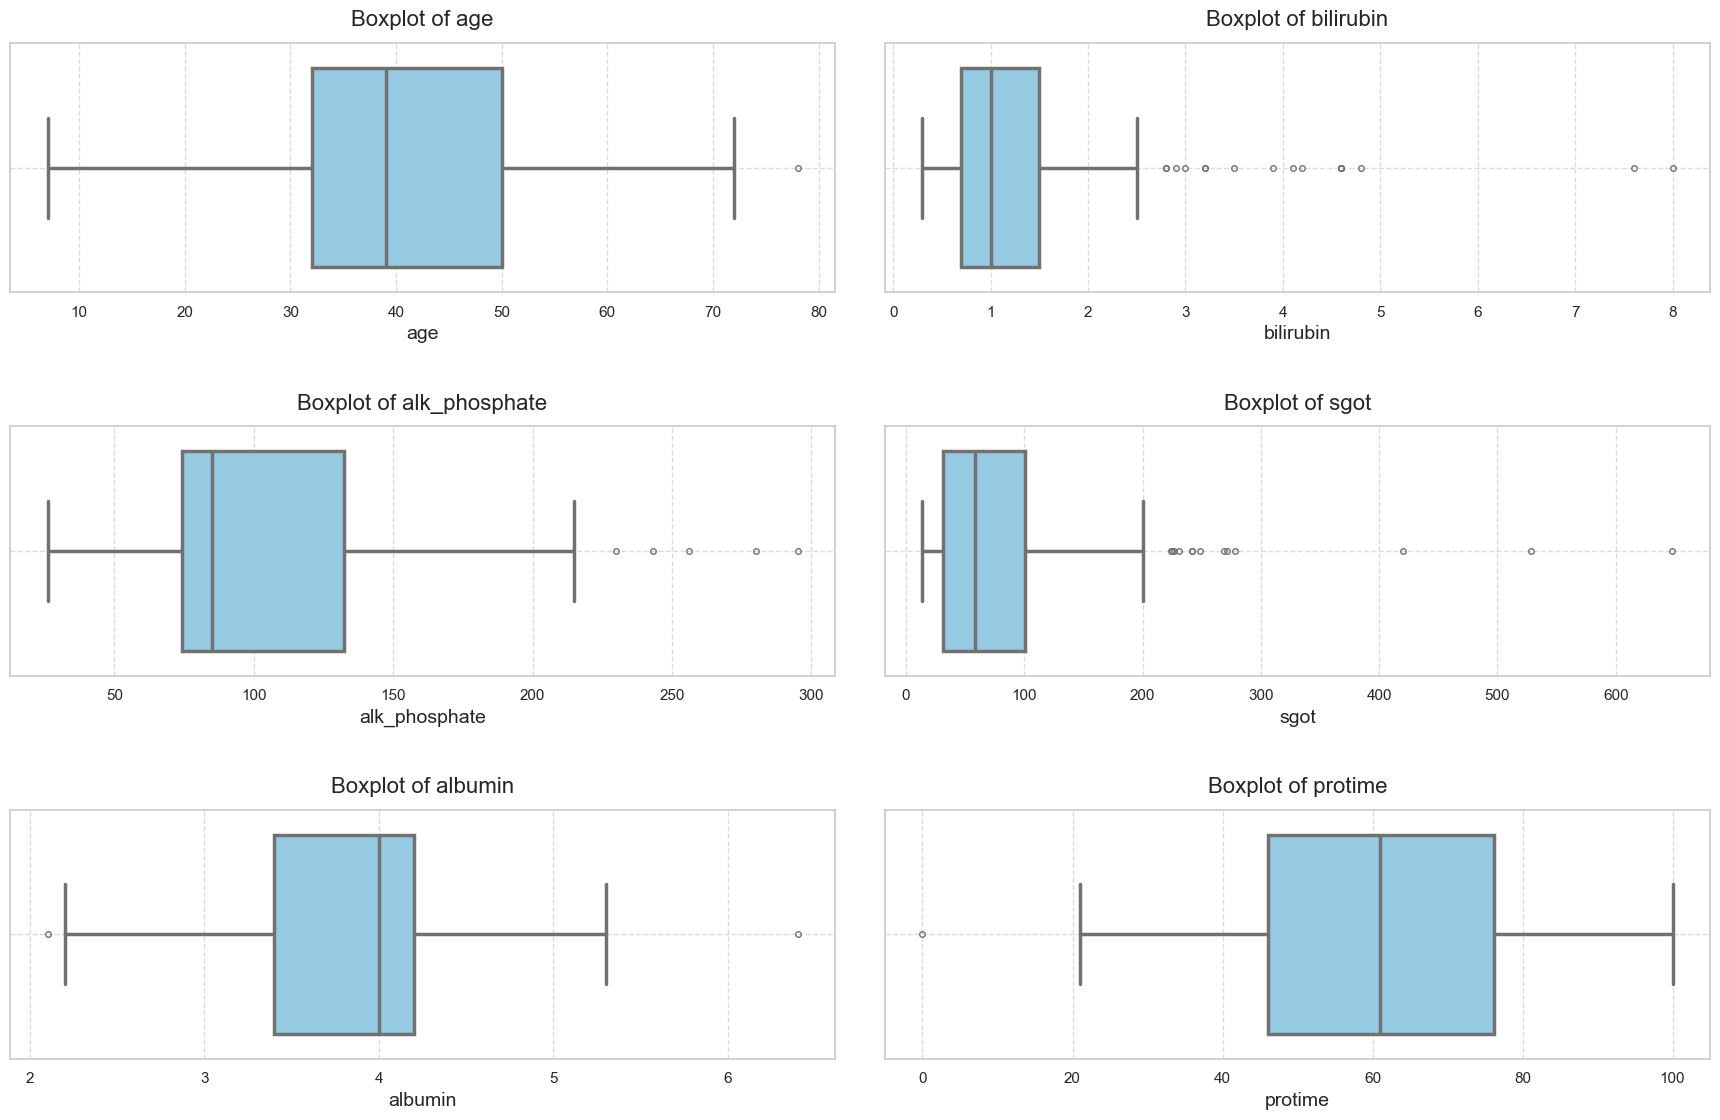

In [8]:
# Boxplots Sub-Plots (Numerical Data)
# ------------------------------------------------------------ #
# Set a specific style
sns.set(style="whitegrid")

# Choose a light blue colour for the boxplots
light_blue = "#89CFF0" # In the RGB color space, hex #89cff0 is also known as Baby blue (https://www.colorhexa.com/)

# Adjusting and setting a specific size of the figure 
plt.figure(figsize=(18, 12))


for index, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, index)  # The number of rows and columns in the resulting plot
    sns.boxplot(x=df[col], color=light_blue, linewidth=2.5, fliersize=4)
    plt.title(f'Boxplot of {col}', fontsize=16, pad=12)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('')

    # Customizing settings for a cleaner look
    plt.grid(True, linestyle='--', alpha=0.7)
    # sns.despine(offset=10, trim=True)

plt.tight_layout(pad=3.0)
# Save the figure 
plt.savefig('./Results/Boxplots_Numerical_Features.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# Handling Missing Data
# Drop rows with missing categorical data
df.dropna(subset=['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites', 'varices'], inplace=True)

# Count the total number of rows remaining in the data frame 
total_rows = df.shape[0]

# Count the number of missing values in each numerical column
missing_values_in_num_cols = df[num_cols].isna().sum()

print(f"Total rows after removing missing categorical data: {total_rows}")
print("Missing values in each numerical column:")
print(missing_values_in_num_cols)


# Approach (1): Fill missing values in numerical columns with the mean of each column
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# # For columns with few missing values, replace  with the mean of that column
# for col in ['bilirubin', 'sgot', 'albumin']:
#     df[col].fillna(df[col].mean(), inplace=True)



Total rows after removing missing categorical data: 142
Missing values in each numerical column:
age               0
bilirubin         4
alk_phosphate    24
sgot              2
albumin          13
protime          57
dtype: int64


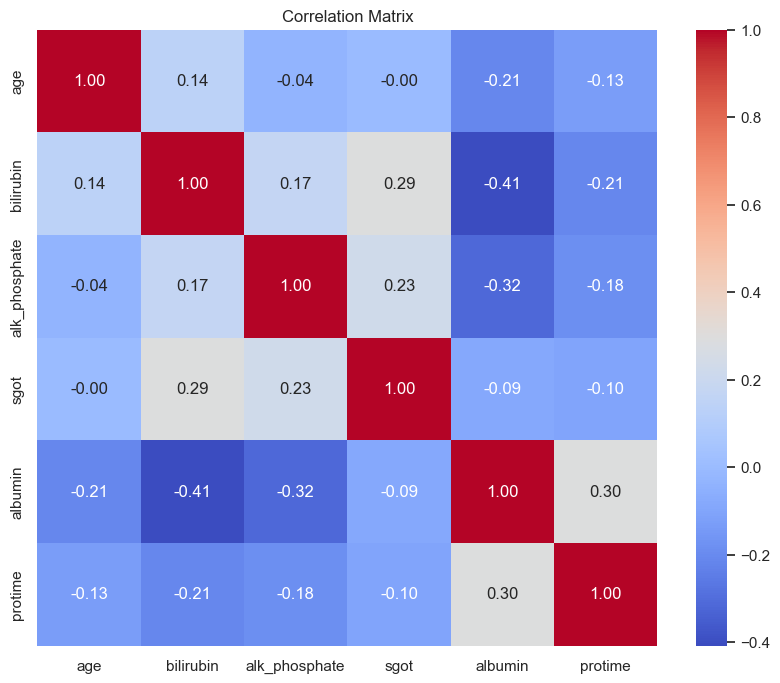

In [10]:
# Select only numeric columns for the correlation matrix
num_df = df.select_dtypes(include=[np.number])

# Calculating the correlation matrix
corr_matrix = num_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
# Save the figure 
plt.savefig('./Results/Correlation_Matrix.png', dpi=300, bbox_inches='tight')
plt.show()

## Predict patients’ serviceability using the presented dataset? What are the main risk factors for death in people with hepatitis?

In [11]:
# The first part of the question, will be answered later in the code

In [12]:
# Categorical Var
# To answer the second part of the question, the percentages of each of the levels for each of the categorical variables 
# being "True" or "False" is calculated and grouped by the "class" column, which represents the final state of the patient 
# ------------------------------------------------------------ #
# The first step is to initialize an empty data frame  to store the results
pivot_cat_df = pd.DataFrame()

for col in cat_cols:
    # Grouping by 'class' and the current categorical column
    count_df = df.groupby(['class', col]).size().unstack(fill_value=0)
    
    # Calculate the percentage of each level within each class
    # For each level of the categorical variables being "True" or "False", the total sum of the class levels in that specific variable level is 100 
    percentage_df = round(count_df.div(count_df.sum(), axis=1) * 100, 3)
    
    # Renaming the columns to indicate the variable name and percentage
    percentage_df.columns = [f'{col}_{col_value}_percentage' for col_value in percentage_df.columns]
    
    # Concatenating the results 
    pivot_cat_df = pd.concat([pivot_cat_df, percentage_df], axis=1)

pivot_cat_df.reset_index(inplace=True)

# Printing the results
print(pivot_cat_df)


  class  steroid_False_percentage  steroid_True_percentage  \
0   die                    22.059                   16.216   
1  live                    77.941                   83.784   

   antivirals_False_percentage  antivirals_True_percentage  \
0                       21.008                       8.696   
1                       78.992                      91.304   

   fatigue_False_percentage  fatigue_True_percentage  \
0                       4.0                   27.174   
1                      96.0                   72.826   

   malaise_False_percentage  malaise_True_percentage  \
0                     9.091                   35.185   
1                    90.909                   64.815   

   anorexia_False_percentage  ...  spleen_palpable_False_percentage  \
0                     15.929  ...                            14.912   
1                     84.071  ...                            85.088   

   spleen_palpable_True_percentage  spiders_False_percentage  \
0         

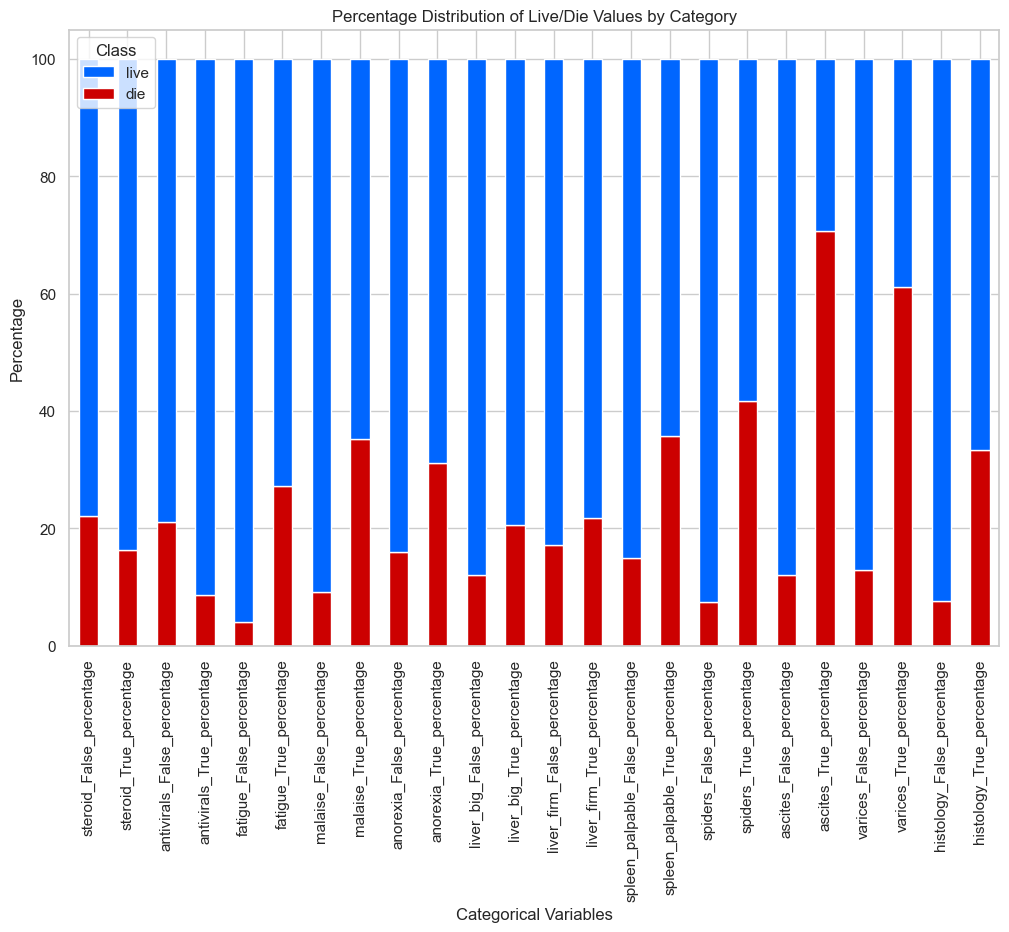

In [13]:
# Visualizing the previous results 
# Percentage distribution of categorical variables by outcome class "Live" vs. "Die"
pivot_cat_df.set_index('class', inplace=True)

# Taking the transpose for the data frame  
pivot_cat_df = pivot_cat_df.T

colors = ['#cc0000', '#0066ff']   # It would be better to use meaningful colours to represent the two classes that we have being 'live' and 'die' 
# Create a stacked bar plot
ax = pivot_cat_df.plot(kind='bar', stacked=True, figsize=(12, 8) , color = colors)

# Set labels and title
plt.xlabel("Categorical Variables")
plt.ylabel("Percentage")
plt.title("Percentage Distribution of Live/Die Values by Category")

# Defining specific legends 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[::-1], labels=labels[::-1], title="Class", loc='upper left')

# Show the plot
plt.xticks()
# Save the figure 
plt.savefig('./Results/Percentage Distribution of Live-Die Values by Category.png', dpi=300, bbox_inches='tight')
plt.show()



In [14]:
# Numerical Variables
# For the same question, but this time for the numerical variables, generating summary statistics for these columns 
# The results are aggregated by the "class" column

# Starting with the data frame  
pivot_num_df = pd.DataFrame()

# num_cols, have already been previously defined in the code 
for col in num_cols:
    # Grouping by 'class' and calculating mean and standard deviation for each numerical column
    summary_df = df.groupby('class')[col].agg(['mean', 'std']).reset_index()
    
    # Renaming the columns to indicate the variable name and statistic
    summary_df.columns = [f'{col}_{stat}' for stat in summary_df.columns]
    
    # Concatenating the results
    pivot_num_df = pd.concat([pivot_num_df, summary_df], axis=1)

# Printing the results
print(pivot_num_df)


  age_class   age_mean    age_std bilirubin_class  bilirubin_mean  \
0       die  44.777778   8.308167             die        2.577992   
1      live  40.069565  12.646837            live        1.130586   

   bilirubin_std alk_phosphate_class  alk_phosphate_mean  alk_phosphate_std  \
0       2.003776                 die          118.646579          51.450800   
1       0.657567                live          102.507590          46.197762   

  sgot_class  sgot_mean   sgot_std albumin_class  albumin_mean  albumin_std  \
0        die  89.046561  63.747073           die      3.247545     0.620228   
1       live  81.897888  86.228042          live      3.964166     0.536301   

  protime_class  protime_mean  protime_std  
0           die     51.442266    16.216999  
1          live     64.696675    17.124709  


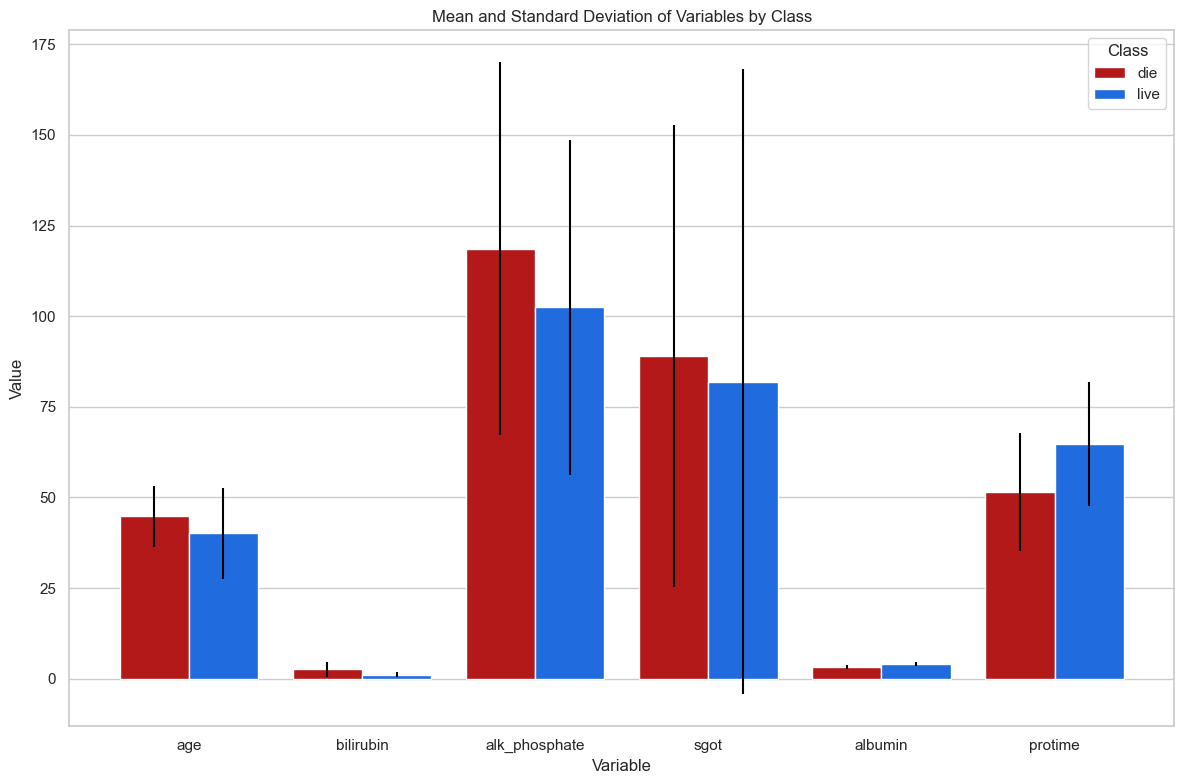

In [15]:
# Visualizing Mean Values and Standard Deviations of Clinical Parameters by Outcome
# ------------------------------------------------------------ #
# Reshaping the data frame into a long format
long_df = pd.DataFrame()

for col in num_cols:
    temp_df = pivot_num_df[[f'{col}_class', f'{col}_mean', f'{col}_std']].copy()
    temp_df.rename(columns={f'{col}_class': 'class', 
                            f'{col}_mean': 'mean', 
                            f'{col}_std': 'std'}, inplace=True)
    temp_df['variable'] = col
    long_df = pd.concat([long_df, temp_df])

# Define the colour palette for the 'class' hue levels
palette = {'live': '#0066ff', 'die': '#cc0000'}  # Blue for 'live', Red for 'die'

plt.figure(figsize=(12, 8))
sns.barplot(x='variable', y='mean', hue='class', data=long_df, palette=palette, errorbar=None)

# Adding error bars, note the color change if needed
for i, variable in enumerate(num_cols):
    subset = long_df[long_df['variable'] == variable]
    plt.errorbar(x=[i - 0.2, i + 0.2], y=subset['mean'], yerr=subset['std'], fmt='none', c='black')

plt.title('Mean and Standard Deviation of Variables by Class')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.legend(title='Class')
plt.tight_layout()
# Save the figure 
plt.savefig('./Results/Mean Values and Standard Deviations of Clinical Parameters by Outcome.png', dpi=300, bbox_inches='tight')
plt.show()



**For most of the variables, except for the "albumin" level, the mean level of the numerical variables across the class of people who did not survive is slightly higher than the mean level of the same variable for people who lived**

**There is a high level of varaiblilty for the varaibles of "age" and "sgot" level for the portion of patients who survived**

## Does the chance of survival significantly correlate with patient variables (age), therapeutic approaches(steroids, antivirals), and clinical markers (ascites, varices)?

In [16]:
# Chi-Square Test Analysis for Categorical Variables 
# List of categorical variables
categorical_vars = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites', 'varices', 'histology']


# Perform Chi-Square test and create data frame 
chi_square_results = []
for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['class'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    is_significant = "Significant" if p < 0.05 else "Nonsignificant"
    # Adding the results
    chi_square_results.append({"Variable": var, "Chi2": chi2, "p-value": p, "DOF": dof, "Expected": str(expected), "Significance": is_significant})

chi_square_df = pd.DataFrame(chi_square_results)

# Define three different categorizations (Symptoms, Therapeutic Approach and clinical markers)
symptoms = ['fatigue', 'malaise', 'anorexia']

therapeutic_approach = ['steroid', 'antivirals']

clinical_markers = ['spiders', 'ascites', 'varices']
# Create subtables
symptoms_df = chi_square_df[chi_square_df['Variable'].isin(symptoms)]
therapeutic_df = chi_square_df[chi_square_df['Variable'].isin(therapeutic_approach)]
clinical_markers_df = chi_square_df[chi_square_df['Variable'].isin(clinical_markers)]

# Print the tables of the results 
print("Symptoms:")
print(tabulate(symptoms_df, headers='keys', tablefmt='grid', showindex=False))

print("\nTherapeutic Approach:")
print(tabulate(therapeutic_df, headers='keys', tablefmt='grid', showindex=False))

print("\nClinical Markers:")
print(tabulate(clinical_markers_df, headers='keys', tablefmt='grid', showindex=False))


Symptoms:
+------------+----------+------------+-------+-----------------------------+----------------+
| Variable   |     Chi2 |    p-value |   DOF | Expected                    | Significance   |
+============+==========+============+=======+=============================+================+
| fatigue    |  9.84272 | 0.00170505 |     1 | [[ 9.50704225 40.49295775]  | Significant    |
|            |          |            |       |  [17.49295775 74.50704225]] |                |
+------------+----------+------------+-------+-----------------------------+----------------+
| malaise    | 13.1516  | 0.00028727 |     1 | [[16.73239437 71.26760563]  | Significant    |
|            |          |            |       |  [10.26760563 43.73239437]] |                |
+------------+----------+------------+-------+-----------------------------+----------------+
| anorexia   |  2.50889 | 0.113205   |     1 | [[21.48591549 91.51408451]  | Nonsignificant |
|            |          |            |       |  [ 

**Referring to the previous results, the main factors that have a significant association with the class variable in the dataset are fatigue, malaise, the presence of spiders (angiomas), ascites, and varices. 
All these factors have shown significant p-values, as per the Chi-Square test results. On the other hand, anorexia, steroid use, and antiviral use did not demonstrate a significant association and, therefore, might not be considered primary risk factors based on this specific analysis.**

In [17]:
# ANOVA Test Analysis for Categorical Variables 
# The ANOVA analysis is performed to test whether there are significant differences in the mean values of numerical variables 
# across different levels of the 'class' variable ('live' or 'die') in the hepatitis dataset
# ------------------------------------------------------------ #
# List of specified numerical columns
num_cols = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']

# ANOVA Analysis
anova_results = []
for var in num_cols:
    # Grouping the data by 'class' and applying ANOVA 
    grouped = df[[var, 'class']].dropna().groupby('class', observed=True)
    f_val, p_val = stats.f_oneway(*[group[var] for name, group in grouped])  # * is the unpacking operator in Python 
    significance = "Significant" if p_val < 0.05 else "Nonsignificant"
    anova_results.append({"Variable": var, "F-Value": f_val, "p-value": p_val, "Significance": significance})

# Create data frame  from the results
anova_df = pd.DataFrame(anova_results)

# Print the table of results 
print("ANOVA Analysis Results:")
print(tabulate(anova_df, headers='keys', tablefmt='grid', showindex=False))


ANOVA Analysis Results:
+---------------+-----------+-------------+----------------+
| Variable      |   F-Value |     p-value | Significance   |
+===============+===========+=============+================+
| age           |  3.38823  | 0.0677803   | Nonsignificant |
+---------------+-----------+-------------+----------------+
| bilirubin     | 41.73     | 1.61054e-09 | Significant    |
+---------------+-----------+-------------+----------------+
| alk_phosphate |  2.55458  | 0.11223     | Nonsignificant |
+---------------+-----------+-------------+----------------+
| sgot          |  0.164109 | 0.686019    | Nonsignificant |
+---------------+-----------+-------------+----------------+
| albumin       | 36.7396   | 1.18526e-08 | Significant    |
+---------------+-----------+-------------+----------------+
| protime       | 13.3553   | 0.000363524 | Significant    |
+---------------+-----------+-------------+----------------+


**Based on the results of the ANOVA table conducted, there are (3) significant numerical variables, with their mean values significantly differing between the two levels of the variable "class" -live or die-. Those variables are the bilirubin, albumin and protime.
On the other hand, the mean values for age, alkaline phosphate, and sgot do not differ significantly across levels of the variable "class"**

## Is there any specific role to the gender of a person surviving the disease or not?

In [18]:
# Re-accessing the columns of the data frame  
df.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [19]:
# Descriptive Statistics
# ------------------------------------------------------------ #
# Calculate descriptive statistics
descriptive_stats = df.groupby('sex')['class'].value_counts(normalize=True)
#  normalize=True, to convert the value counts to proportions rather than absolute counts 

# Convert to percentages and format
descriptive_stats_percent = (descriptive_stats.mul(100)
                             .round(2)
                             .astype(str) + '%')

# Convert the series to a data frame  for a tabular format
descriptive_stats_table = descriptive_stats_percent.unstack(fill_value='0%')

# Print the results
print(descriptive_stats_table)

class      die    live
sex                   
female  21.26%  78.74%
male        0%  100.0%


      sex class  percentage
0  female  live       78.74
1  female   die       21.26
2    male  live      100.00


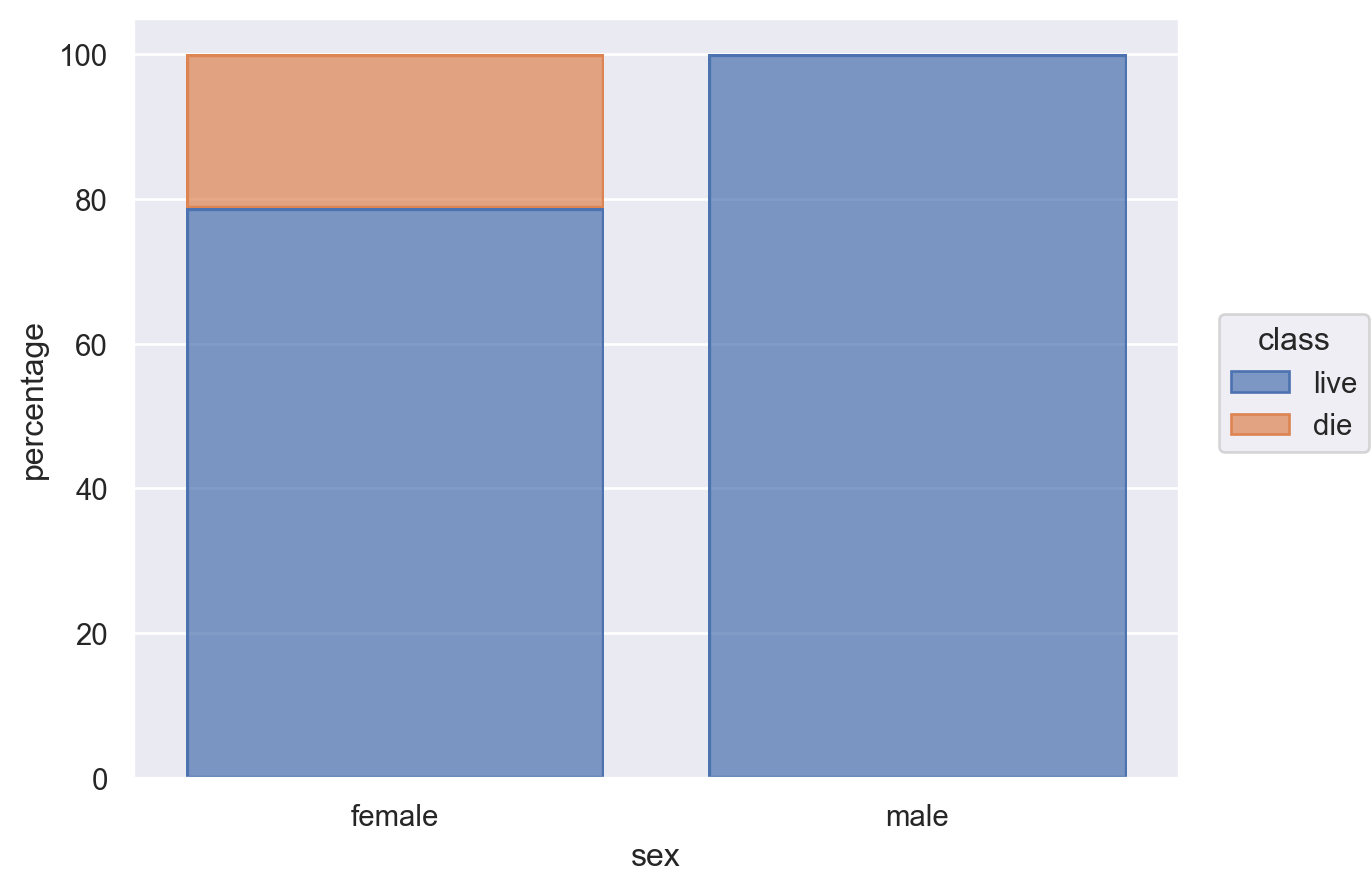

In [20]:
# Visualizing The Results
# ------------------------------------------------------------ #
# Reset index to convert the Series to a data frame 
descriptive_stats_df = descriptive_stats_percent.reset_index(name='percentage')

descriptive_stats_df.dtypes  # To double-check the data type for each of the columns 

# Convert 'percentage' from string to float
descriptive_stats_df['percentage'] = descriptive_stats_df['percentage'].str.rstrip('%').astype('float')

print(descriptive_stats_df)
plot = (
    so.Plot(data= descriptive_stats_df,
            x = 'sex',
            y = 'percentage',
            color = 'class',  # Encoding the class to be the colour of the bars
           )
       .add(so.Bar(), so.Agg(), so.Stack()) 
      
)

# Save the plot to a file
plot.save('./Results/Descriptive_Stats_Percentage_by_Sex_and_Class.png', dpi=300, bbox_inches='tight')


In [21]:
# df.dtypes
min_age = df['age'].min()
max_age = df['age'].max()

print("Minimum Age:", min_age)
print("Maximum Age:", max_age)

Minimum Age: 7
Maximum Age: 78


In [22]:
# Correlation Tests for The Age Variable: Correlation between age and survival

# Mapping 'live' to 1 and 'die' to 0
df['class_numeric'] = df['class'].map({'live': 1, 'die': 0})

corr_age = stats.pearsonr(df['age'], df['class_numeric'])  # To calculate the Pearson correlation coefficient (A measure of a linear correlation between two variables)
print("Correlation between age and survival:", corr_age)
# The Pearson correlation coefficient is a number that ranges between (-1 and 1)
# -1 indicates a perfect negative linear relation, and 1 indicates a perfect positive linear relation. (Zero indicates NO linear relationship between the variables)
# ------------------------------------------------------------ #
# PearsonRResult(statistic=-0.15371985472325142, pvalue=0.06778033926942885)
# This indicates a weak negative correlation between age and survivability
# The p-value indicates that the results are not statistically significant at 0.05 significance level


# Dropping the 'class_numeric' column because later in the code, all categorical variables will be dummy encoded in one shot
df.drop('class_numeric', axis=1, inplace=True)

Correlation between age and survival: PearsonRResult(statistic=-0.15371985472325142, pvalue=0.06778033926942885)


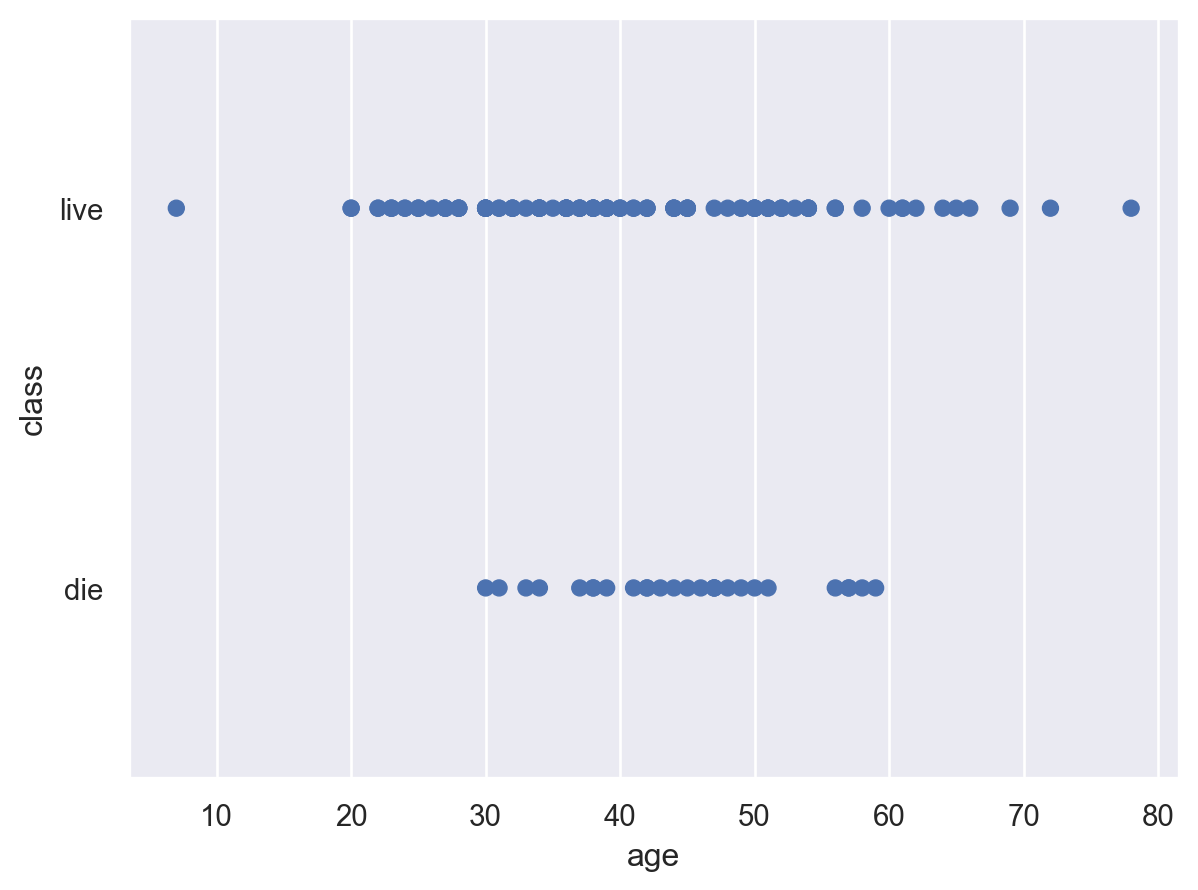

In [23]:
# Visualizing the relationship between age and survivability 

(
    so.Plot(df,x = 'age',y = 'class')  # The relationship between "age" and "class_live"
      .add(so.Dot())
      #.add(so.Line(color = 'red'), so.PolyFit(order = 1))    
    
)

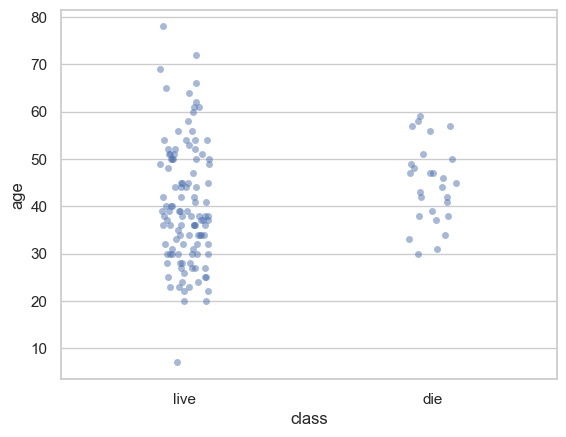

In [24]:
# To examine the relationship between one continuous variable, "age", and one categorical variable, "class_live", a strip plot can be used

# There is a horizontal variation for data points within each group, which is something that is called the jitter
# Jitter is to avoid having too many data points that are plotted on the exact same line, which says it is a (Random Noise) that does not mean anything
sns.stripplot(data= df, x = "class", y = "age", jitter =0.1, size =5, alpha = 0.5)
# In the previous line of code, we have specified the jitter parameter and the size of the markers using the size parameter

# Save the figure
plt.savefig('./Results/Age_Class_Stripplot.png', dpi=300, bbox_inches='tight')

## Are there any significant differences in the performance of different classification models for predicting the survival of a patient?

## Predicting Patients' Survivability Using Logestic Regression

In [25]:
# Converting categorical columns into numerical columns
# Identify categorical columns that need to be converted to numerical format for machine learning models
cat_cols = ['class', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
                    'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
                    'varices', 'histology']

# Loop through each categorical column to convert them into dummy/indicator variables
for col in cat_cols:
    # Convert each categorical column into dummy variables. 
    # where each unique value in the column becomes a new binary column (0 or 1).
    # 'drop_first=True' omits the first category to prevent multicollinearity (dummy variable trap).
    # 'dtype=int' ensures the new columns are of integer type.
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True, dtype=int)

    # Concatenate the new dummy variables to the original data frame .
    df = pd.concat([df, dummies], axis=1)

    # Remove the original categorical column, as it's now represented by the dummy variables.
    # df.drop(col, axis=1, inplace=True)  # BETTER TO KEEP!

# Display the first few rows of the updated data frame  to verify changes
df.head()

# Display the column names to see the new structure of the data frame 
df.columns


Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class', 'class_live', 'sex_male', 'steroid_True',
       'antivirals_True', 'fatigue_True', 'malaise_True', 'anorexia_True',
       'liver_big_True', 'liver_firm_True', 'spleen_palpable_True',
       'spiders_True', 'ascites_True', 'varices_True', 'histology_True'],
      dtype='object')

In [26]:
df.head(20)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,...,fatigue_True,malaise_True,anorexia_True,liver_big_True,liver_firm_True,spleen_palpable_True,spiders_True,ascites_True,varices_True,histology_True
0,30,male,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,50,female,False,False,True,False,False,False,False,False,...,1,0,0,0,0,0,0,0,0,0
2,78,female,True,False,True,False,False,True,False,False,...,1,0,0,1,0,0,0,0,0,0
4,34,female,True,False,False,False,False,True,False,False,...,0,0,0,1,0,0,0,0,0,0
5,34,female,True,False,False,False,False,True,False,False,...,0,0,0,1,0,0,0,0,0,0
6,51,female,False,False,True,False,True,True,False,True,...,1,0,1,1,0,1,1,0,0,0
7,23,female,True,False,False,False,False,True,False,False,...,0,0,0,1,0,0,0,0,0,0
8,39,female,True,False,True,False,False,True,True,False,...,1,0,0,1,1,0,0,0,0,0
9,30,female,True,False,False,False,False,True,False,False,...,0,0,0,1,0,0,0,0,0,0
10,39,female,False,True,False,False,False,False,True,False,...,0,0,0,0,1,0,0,0,0,0


In [27]:
# Accessing the columns' headers
df.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class', 'class_live', 'sex_male', 'steroid_True',
       'antivirals_True', 'fatigue_True', 'malaise_True', 'anorexia_True',
       'liver_big_True', 'liver_firm_True', 'spleen_palpable_True',
       'spiders_True', 'ascites_True', 'varices_True', 'histology_True'],
      dtype='object')

In [28]:
# ------------------------------------------------------------ #
# METHOD_1: Using the statsmodels
# Identify Predictor Variables
# Define the numeric columns you want to include
num_cols = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']  # Previosuly defined (Added for clarity)

# Dummy columns: selecting columns that end with 'True'
true_cols = [col for col in df.columns if col.endswith('True')]

# Combine the lists and include the columns that represents the sex as a binary variable
predictors = num_cols + true_cols + ['sex_male']

# Create the Regression Formula
# The regression formula is used to define the model to be fitted.
# The format is 'dependent_variable ~ independent_variable1 + independent_variable2 + ...'
# Here, 'class_live' is the dependent variable, and all other columns are independent variables.
# The 'join' function is utilized to concatenate all predictor column names, separated by ' + ', to create the formula.
formula = 'class_live ~ ' + ' + '.join(predictors)

# Build the Logistic Regression Model
# The 'logit' function from statsmodels.formula.api is used to perform logistic regression
# 'formula' defines the model structure (dependent -target- and independent variables -predictors-)
# The 'fit' method fits the logistic regression model to the data and stores the result in 'result'
result = smf.logit(formula=formula, data=df).fit()

# Print the Model Summary
#'result.summary()' provides a summary of the logistic regression model
# This includes information about the model coefficients, their statistical significance,
# and other measures related to evaluating the model's performance
print(result.summary())


         Current function value: 0.230909
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             class_live   No. Observations:                  142
Model:                          Logit   Df Residuals:                      122
Method:                           MLE   Df Model:                           19
Date:                Mon, 11 Dec 2023   Pseudo R-squ.:                  0.5253
Time:                        10:52:26   Log-Likelihood:                -32.789
converged:                      False   LL-Null:                       -69.073
Covariance Type:            nonrobust   LLR p-value:                 3.425e-08
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.4013      4.365      0.321      0.748      -7.154       9.956
age                     -0.0191    

C:\Users\alkurdi\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
result.params    
# params is an attribute to the results
# This will give us the values for the intercept and the slope of each of the predictors
# The slope refers to the change in y when x changes by a single unit 
# ------------------------------------------------------------ #

Intercept                1.401334
age                     -0.019082
bilirubin               -0.901569
alk_phosphate           -0.002250
sgot                     0.004802
albumin                  0.769272
protime                  0.018357
steroid_True             0.958470
antivirals_True         -0.338973
fatigue_True            -0.663597
malaise_True            -0.247615
anorexia_True            2.133535
liver_big_True          -0.969306
liver_firm_True          0.687075
spleen_palpable_True    -0.352731
spiders_True            -2.512320
ascites_True            -1.495664
varices_True            -0.472871
histology_True           0.242751
sex_male                25.558482
dtype: float64

In [30]:
# ------------------------------------------------------------ #
# METHOD_2: Using the scikit-learn

# Preparing the data for logistic regression
X = df[predictors]  # Using the exact same predictors to define the features (X)
y = df['class_live']  # Define the target variable (y)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
# "test_size=0.2" means 20% of the data is reserved for testing

# Instantiating the logistic regression model
clf = LogisticRegression(max_iter=1000)  # Create a logistic regression classifier
# max_iter=1000 increases the number of iterations to ensure convergence (This part was added to avoid a warning message)

# Setting up cross-validation parameters
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123)  
# RepeatedKFold splits the data into 5 parts (folds), repeating this process 3 times
# random_state=123 ensures that the splits are reproducible and consistent across runs

# Performing the cross-validation on the training data
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv)  
# cross_val_score evaluates the model (clf) using the training data with defined cross-validation (cv)
# It returns a list of accuracy scores, one for each fold of each repeat (3 x 5)

# Displaying the results of cross-validation
print("Cross-Validation Accuracies for each fold and repeat:")
print(scores)  # Prints the accuracy of each fold in each repeat

# Calculating the average performance across all folds and repeats
mean_cv_accuracy = np.mean(scores)  # Computes the mean accuracy of cross-validation
print(f"Mean Cross-Validation Accuracy: {mean_cv_accuracy:.4f}")

# Fitting the model on the entire training set
clf.fit(X_train, y_train)

# Evaluating the model on the test set
test_accuracy = clf.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
# Prints the accuracy on the test set to understand the model's performance on unseen data


Cross-Validation Accuracies for each fold and repeat:
[0.91304348 0.91304348 0.69565217 0.86363636 0.86363636 0.7826087
 0.91304348 0.82608696 0.81818182 0.95454545 0.86956522 0.7826087
 0.86956522 0.81818182 0.86363636]
Mean Cross-Validation Accuracy: 0.8498
Test Accuracy: 0.7931


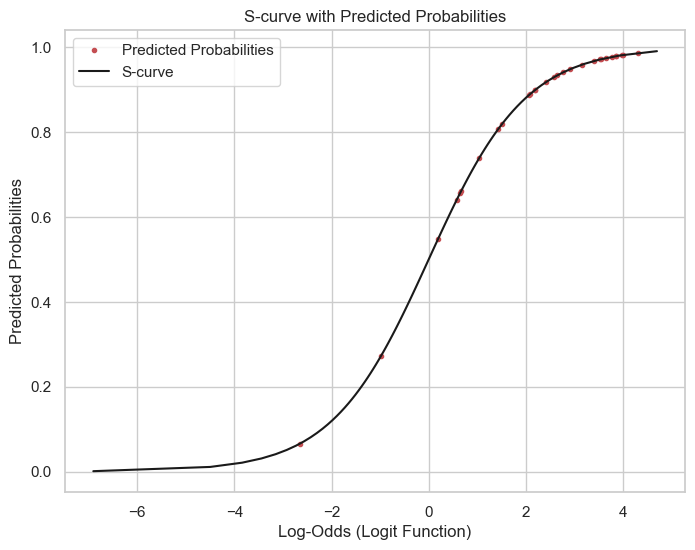

In [31]:
# S-Curve
# Predict probabilities using the logistic regression model
y_pred_probs = clf.predict_proba(X_test)[:, 1]

# Calculate the log-odds using the logit function
log_odds = np.log(y_pred_probs / (1 - y_pred_probs))

# Plotting the predicted probabilities as transformed by the logit function (log-odds)
plt.figure(figsize=(8, 6))
plt.plot(log_odds, y_pred_probs, 'r.', label='Predicted Probabilities')

# Plotting the S-function (Sigmoid Curve)
y_sim = np.arange(0.001, 1.0, 0.01)
logit_curve = np.log(y_sim / (1 - y_sim))
plt.plot(logit_curve, y_sim, 'k', label='S-curve')

plt.title("S-curve with Predicted Probabilities")
plt.xlabel("Log-Odds (Logit Function)")
plt.ylabel("Predicted Probabilities")
plt.legend()
plt.savefig('./Results/S-curve with Predicted Probabilities.png', dpi=300, bbox_inches='tight')
plt.show()


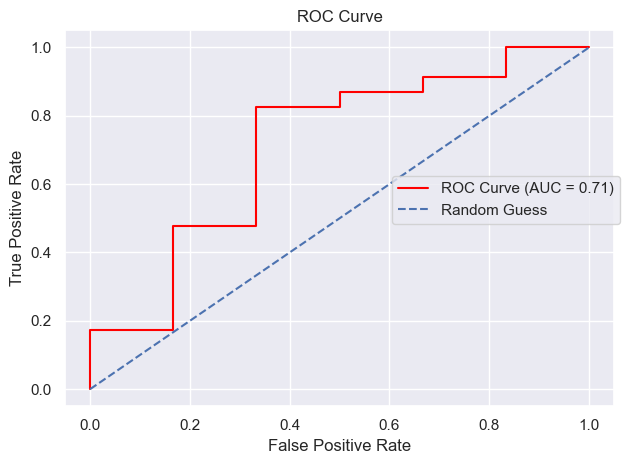

In [32]:
# ROC-Curve
# Generating the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Creating a data frame  from the FPR and TPR
roc_df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})

# Plotting the ROC curve
plot = (
    so.Plot(roc_df, x='fpr', y='tpr')
    .add(so.Line(color='red'), label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
    # Adding a dashed diagonal line that represents a random guessing (Each time you develop a classification model, the performance can not be worse than random guessing)
    .add(so.Line(linestyle='dashed'), data=pd.DataFrame({'x': [0, 1], 'y': [0, 1]}), x='x', y='y', label='Random Guess')
     # Updating the labels for the x-axis and the y-axis and the title of the plot
    .label(x='False Positive Rate', y='True Positive Rate', title='ROC Curve')
    #.show()
)
# Saving the figure
plot.save('./Results/ROC_Curve_Logistic_Regression.png', dpi=300, bbox_inches='tight')
plot.show()

Confusion Matrix:
[[ 1  5]
 [ 1 22]]


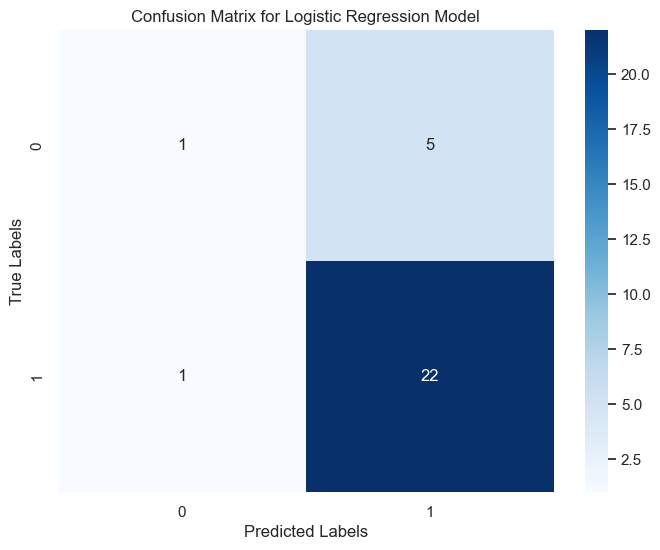

In [33]:
# Confusin Matrix
# Utilizing the predefined "Logistic regression Model" to predict the target values for the test set
y_pred = clf.predict(X_test)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualizing the confusion matrix for the "Logistic regression Model"
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('./Results/Logit_Confusion_Matrix.png', dpi=300, bbox_inches='tight')
plt.show()


In [34]:
# Performance Metrics for "Logistic regression Model"
# Calculate the performance metrics for the Logistic regression Model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


print("Performance Metrics for Logistic regression Model:")

# Print the performance metrics
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-Score: {f1*100:.2f}%")
print(f"Accuracy: {accuracy*100:.2f}%")


Performance Metrics for Logistic regression Model:
Precision: 81.48%
Recall: 95.65%
F1-Score: 88.00%
Accuracy: 79.31%


## Predicting Patients' Survivability Using KNN Algorithm

In [35]:
# Preparing the data for KNN
X = df[predictors]   # Using the exact same predictors to define the features (X)
y = df['class_live']  # Define the target variable (y)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
# This has already been performed, but was added here for better clarity and readability 

# Instantiating the KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Setting up cross-validation parameters
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123)  
# RepeatedKFold splits the data into 5 parts (folds), repeating this process 3 times
# random_state=123 ensures that the splits are reproducible and consistent across runs

# Performing the cross-validation on the training data
scores = cross_val_score(knn_clf, X_train, y_train, scoring='accuracy', cv=cv)  

# Displaying the results of cross-validation
print("Cross-Validation Accuracies for each fold and repeat:")
print(scores)  # Prints the accuracy of each fold in each repeat

# Calculating the average performance across all folds and repeats
mean_cv_accuracy = np.mean(scores)  # Computes the mean accuracy
print(f"Mean Cross-Validation Accuracy: {mean_cv_accuracy:.4f}")

# Fitting the model on the entire training set
knn_clf.fit(X_train, y_train)

# Evaluating the model on the test set
test_accuracy = knn_clf.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
# Prints the accuracy on the test set to understand the model's performance on unseen data


Cross-Validation Accuracies for each fold and repeat:
[0.86956522 0.73913043 0.69565217 0.77272727 0.81818182 0.60869565
 0.82608696 0.69565217 0.90909091 0.81818182 0.82608696 0.7826087
 0.7826087  0.81818182 0.68181818]
Mean Cross-Validation Accuracy: 0.7763
Test Accuracy: 0.7586


## Comparing The Perfomenace of The Models (Logstic Regression Vs. KNN Algorithm)

**As a result, the mean performance for the logistic regression model is better than the mean performance for the KNN algorithm. This could be because we did not scale all the parameters before performing the KNN algorithm or as the hyperparameters were not optimized.**

In [36]:
# Scaling The Data
# ------------------------------------------------------------ #
# Defining the list of columns to scale
columns_to_scale = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
                    'sex_male', 'steroid_True', 'antivirals_True',
                    'fatigue_True', 'malaise_True', 'anorexia_True', 'liver_big_True',
                    'liver_firm_True', 'spleen_palpable_True', 'spiders_True',
                    'ascites_True', 'varices_True', 'histology_True']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale each of the columns and add it to the data frame 
for col in columns_to_scale:   # Loop through each of the columns
    df[f'{col}_scaled'] = scaler.fit_transform(df[[col]])
    # Each column specified by col is being scaled, and then this scaled data is added as a new column to the df.
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,...,fatigue_True_scaled,malaise_True_scaled,anorexia_True_scaled,liver_big_True_scaled,liver_firm_True_scaled,spleen_palpable_True_scaled,spiders_True_scaled,ascites_True_scaled,varices_True_scaled,histology_True_scaled
0,30,male,False,False,False,False,False,False,False,False,...,-1.356466,-0.783349,-0.506594,-2.163331,-0.855399,-0.495595,-0.714590,-0.368782,-0.381000,-0.893011
1,50,female,False,False,True,False,False,False,False,False,...,0.737210,-0.783349,-0.506594,-2.163331,-0.855399,-0.495595,-0.714590,-0.368782,-0.381000,-0.893011
2,78,female,True,False,True,False,False,True,False,False,...,0.737210,-0.783349,-0.506594,0.462250,-0.855399,-0.495595,-0.714590,-0.368782,-0.381000,-0.893011
4,34,female,True,False,False,False,False,True,False,False,...,-1.356466,-0.783349,-0.506594,0.462250,-0.855399,-0.495595,-0.714590,-0.368782,-0.381000,-0.893011
5,34,female,True,False,False,False,False,True,False,False,...,-1.356466,-0.783349,-0.506594,0.462250,-0.855399,-0.495595,-0.714590,-0.368782,-0.381000,-0.893011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,...,0.737210,1.276569,1.973969,0.462250,-0.855399,-0.495595,1.399405,2.711631,2.624669,1.119807
151,44,female,True,False,True,False,False,True,True,False,...,0.737210,-0.783349,-0.506594,0.462250,1.169045,-0.495595,-0.714590,-0.368782,-0.381000,1.119807
152,61,female,False,False,True,True,False,False,True,False,...,0.737210,1.276569,-0.506594,-2.163331,1.169045,-0.495595,1.399405,-0.368782,-0.381000,1.119807
153,53,male,False,False,True,False,False,True,False,True,...,0.737210,-0.783349,-0.506594,0.462250,-0.855399,2.017778,1.399405,-0.368782,2.624669,1.119807


In [37]:
# Hyperparameter Tuning: involves systematically searching through a predefined hyperparameter space 
# To find the combination of values that results in the best model performance metric
# The hyperparameter in this case is k, which represents the number of neighbours
# Initiating an empty list to hold the accuracies for each k
mean_accuracies = []

for k in range(1, 20, 2):  # Since there are two classes, we kind of want to avoid the even numbers (Odds values of k)
    # Perform cross-validation on the training data and compute mean accuracy
    score = cross_val_score(KNeighborsClassifier(n_neighbors=k), 
                            X_train, y_train, cv=cv).mean().round(3)
    mean_accuracies.append(score)  # Appending the mean accuracy value that is computed for each unique k to the mean_accuracies list

    print(f"k = {k}, Mean Accuracy: {score:.3f}")  # Printing the mean accuracy score for each k 

# The best k value corresponds to the highest accuracy
best_k = range(1, 20, 2)[np.argmax(mean_accuracies)]
best_score = max(mean_accuracies)
print(f"Best k: {best_k}, Best Mean Accuracy: {best_score:.3f}")

# Fitting the KNN classifier with the best k value on the entire training set and evaluating it on the test set
knn_clf_best = KNeighborsClassifier(n_neighbors=best_k)
knn_clf_best.fit(X_train, y_train)
test_accuracy = knn_clf_best.score(X_test, y_test)
print(f"Test Accuracy with Best k ({best_k}): {test_accuracy:.3f}")


k = 1, Mean Accuracy: 0.708
k = 3, Mean Accuracy: 0.768
k = 5, Mean Accuracy: 0.776
k = 7, Mean Accuracy: 0.767
k = 9, Mean Accuracy: 0.788
k = 11, Mean Accuracy: 0.812
k = 13, Mean Accuracy: 0.815
k = 15, Mean Accuracy: 0.815
k = 17, Mean Accuracy: 0.815
k = 19, Mean Accuracy: 0.815
Best k: 13, Best Mean Accuracy: 0.815
Test Accuracy with Best k (13): 0.793


**The next step is to reperform the KNN agorithm, but this time using the scaled columns and the best k obtained by the grid-search**

In [38]:
# Defining the list of scaled column names
scaled_columns = [f'{col}_scaled' for col in columns_to_scale]

# Define the feature matrix X using the scaled columns
X = df[scaled_columns]

# Define the target variable y
y = df['class_live']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
# This has already been performed but was added here for better clarity and readability 

# Instantiating the KNN classifier with the best k and the scaled data
# Defining the number of neighbors (n_neighbors) to be 13
knn_clf = KNeighborsClassifier(n_neighbors=13)

# Setting up cross-validation parameters
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123)  
# RepeatedKFold splits the data into 5 parts (folds), repeating this process 3 times
# random_state=123 ensures that the splits are reproducible and consistent across runs

# Performing the cross-validation on the training data
# cross_val_score evaluates the model (knn_clf) using the training data with defined cross-validation (cv)
# It returns a list of 15 accuracy scores, one for each fold of each repeat (3 x 5)
scores = cross_val_score(knn_clf, X_train, y_train, scoring='accuracy', cv=cv)  

# Displaying the results of cross-validation
print("Cross-Validation Accuracies for each fold and repeat:")
print(scores)  # Prints the accuracy of each fold in each repeat

# Calculating the average performance across all folds and repeats
mean_cv_accuracy = np.mean(scores)  # Computes the mean accuracy
print(f"Mean Cross-Validation Accuracy: {mean_cv_accuracy:.4f}")
# Prints the mean to understand the average performance

# Fitting the model on the entire training set
knn_clf.fit(X_train, y_train)

# Evaluating the model on the test set
test_accuracy = knn_clf.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
# Prints the accuracy on the test set to understand the model's performance on unseen data

Cross-Validation Accuracies for each fold and repeat:
[0.91304348 0.86956522 0.7826087  0.86363636 0.90909091 0.69565217
 0.95652174 0.73913043 0.81818182 0.95454545 0.82608696 0.7826087
 0.91304348 0.86363636 0.86363636]
Mean Cross-Validation Accuracy: 0.8501
Test Accuracy: 0.7586


**The result of the KNN algorithm afetr utilizing the best k and the scaled columns is out-performing the results for the logetsic regression model.**

## KNN-Classifier Performance Metrics

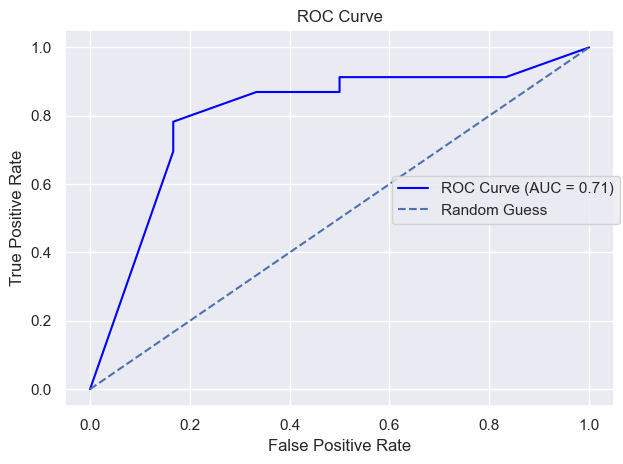

In [39]:
# ROC-Curve
# Acessing the predicted probabilities on the test set
y_prob = knn_clf.predict_proba(X_test)[:, 1]  # Getting access to the probabilities for the positive class

# Generating the ROC curve values
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_prob)

roc_df_knn = pd.DataFrame({'fpr':fpr_knn, 'tpr':tpr_knn})
# Plotting the ROC curve
plot = (
    so.Plot(roc_df_knn, x='fpr', y='tpr')
    .add(so.Line(color='blue'), label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
    # Adding a dashed diagonal line that represents a random guessing (Each time you develop a classification model, the performance can not be worse than random guessing)
    .add(so.Line(linestyle='dashed'), data=pd.DataFrame({'x': [0, 1], 'y': [0, 1]}), x='x', y='y', label='Random Guess')
     # Updating the labels for the x-axis and the y-axis and the title of the plot
    .label(x='False Positive Rate', y='True Positive Rate', title='ROC Curve')
    #.show()
)
# Saving the figure
plot.save('./Results/ROC_Curve_KNN.png', dpi=300, bbox_inches='tight')
plot.show()


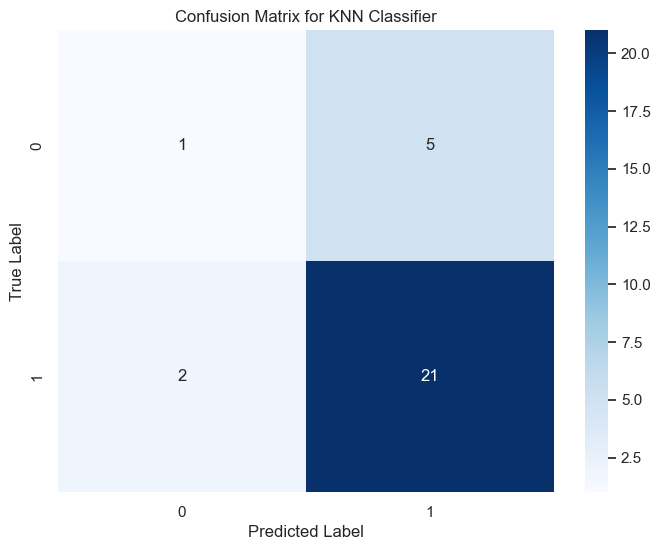

In [40]:
# Assseising the performance of the KNN-classifier using a confusion matrix
# ------------------------------------------------------------ #
# Predicting the Test set results
y_pred = knn_clf.predict(X_test)

# Creating the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [41]:
# Performance Metrics for KNN Classifier
# Calculate the performance metrics for the KNN classifier
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Performance Metrics for KNN Classifier:")

# Print the performance metrics
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-Score: {f1*100:.2f}%")
print(f"Accuracy: {accuracy*100:.2f}%")


Performance Metrics for KNN Classifier:
Precision: 80.77%
Recall: 91.30%
F1-Score: 85.71%
Accuracy: 75.86%


## Predicting Patients' Survivability Using Decison Tree Algorithm

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Preparing the data for Decision Tree
X = df[predictors]   # Using the exact same predictors to define the features (X)
y = df['class_live']  # Define the target variable (y)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
# This has already been performed but was added here for better clarity and readability 

# Instantiating the Decision Tree classifier
dt_clf = DecisionTreeClassifier()

# Setting up cross-validation parameters
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123)  
# RepeatedKFold splits the data into 5 parts (folds), repeating this process 3 times
# random_state=123 ensures that the splits are reproducible and consistent across runs

# Performing the cross-validation on the training data
scores = cross_val_score(dt_clf, X_train, y_train, scoring='accuracy', cv=cv)  

# Displaying the results of cross-validation
print("Cross-Validation Accuracies for each fold and repeat:")
print(scores)  # Prints the accuracy of each fold in each repeat

# Calculating the average performance across all folds and repeats
mean_cv_accuracy = np.mean(scores)  # Computes the mean accuracy
print(f"Mean Cross-Validation Accuracy: {mean_cv_accuracy:.4f}")

# Fitting the model on the entire training set
dt_clf.fit(X_train, y_train)

# Evaluating the model on the test set
test_accuracy = dt_clf.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
# Prints the accuracy on the test set to understand the model's performance on unseen data


Cross-Validation Accuracies for each fold and repeat:
[0.7826087  0.82608696 0.73913043 0.77272727 0.81818182 0.73913043
 0.82608696 0.7826087  0.72727273 0.90909091 0.86956522 0.69565217
 0.7826087  0.77272727 0.81818182]
Mean Cross-Validation Accuracy: 0.7908
Test Accuracy: 0.6897


## Decsion Tree Performance Metrics

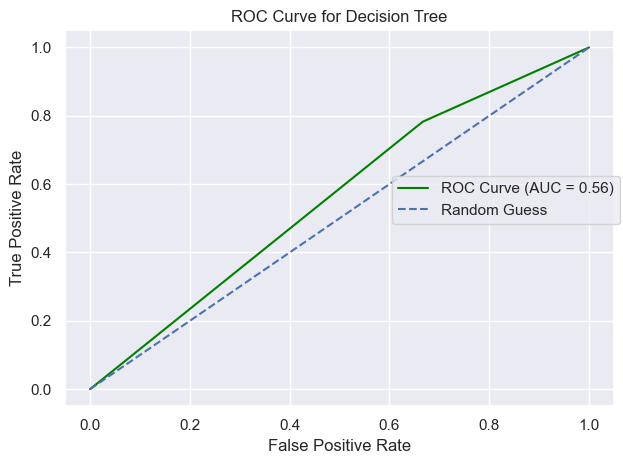

In [43]:
# ROC-Curve
# Accessing the predicted probabilities on the test set for the Decision Tree
y_prob_dt = dt_clf.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

# Generating the ROC curve values
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)

# Preparing DataFrame for plotting
roc_df_dt = pd.DataFrame({'fpr': fpr_dt, 'tpr': tpr_dt})

# Plotting the ROC curve
plot_dt = (
    so.Plot(roc_df_dt, x='fpr', y='tpr')
    .add(so.Line(color='green'), label='ROC Curve (AUC = {:.2f})'.format(roc_auc_dt))
    .add(so.Line(linestyle='dashed'), data=pd.DataFrame({'x': [0, 1], 'y': [0, 1]}), x='x', y='y', label='Random Guess')
    .label(x='False Positive Rate', y='True Positive Rate', title='ROC Curve for Decision Tree')
)

# Saving the figure for Decision Tree
plot_dt.save('./Results/ROC_Curve_DecisionTree.png', dpi=300, bbox_inches='tight')
plot_dt.show()


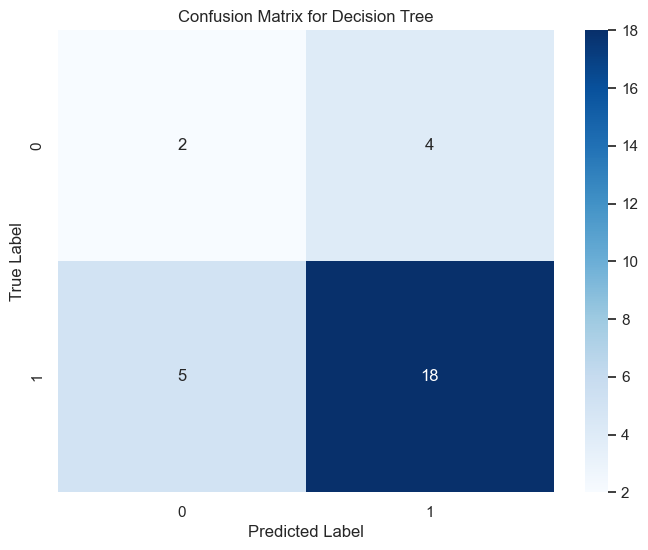

In [44]:
# Assseising the performance of the decision tree using a confusion matrix
# ------------------------------------------------------------ #
# Predicting the Test set results
y_pred = dt_clf.predict(X_test)

# Creating the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [45]:
# Performance Metrics for Decsion Tree Model
# Calculate the performance metrics for the decsion tree model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Performance Metrics for Decsion Tree Model:")

# Print the performance metrics
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-Score: {f1*100:.2f}%")
print(f"Accuracy: {accuracy*100:.2f}%")


Performance Metrics for Decsion Tree Model:
Precision: 81.82%
Recall: 78.26%
F1-Score: 80.00%
Accuracy: 68.97%


## What are the most important features that will give the best-performing model for prediction of the surviving of the patient?

In [46]:
# Different techniques can be used to perform the features selection; the analysis performed in this part was based on "scikit-learn" official documentation

# Removing features with low variance: A baseline approach to feature selection. It removes the features with variance less than a  specific threshold.
# By default, all zero-variance features (features with constant values across the whole data frame  are removed)
# ------------------------------------------------------------ #
# Univariate feature selection: Selecting the best features based on a statistical test. 

In [47]:
# Removing features with low variance
# The steps that are to be followed here are (1) defining the feature matrix, (2) instantiating the model, and defining its parametrs

# scaled_columns = [f'{col}_scaled' for col in columns_to_scale]  # To select all the scaled columns out of the data frame
# NOT a good approach as the scaled columns have a mean value of zero and a standard deviation of 1 

# Defining the list of the unscaled feature matrix has already been defined but added for better readability of the code 
predictors = num_cols + true_cols + ['sex_male']

# So, because we have two different sets of predictors, numerical and categorical, the variables will be separated for ease of calculating the "variance threshold"
X_numerical = X[num_cols]
X_categorical = X[true_cols + ['sex_male']]

# Setting the VarianceThreshold for numerical features 
threshold_numerical = 0.80
variance_threshold_numerical = VarianceThreshold(threshold=threshold_numerical)
X_numerical_reduced = variance_threshold_numerical.fit_transform(X_numerical)

# For categorical features, it is different because Boolean features are Bernoulli random variables 
# For Bernoulli variables, variance = p * (1 - p), where p is the probability of success 
variances_categorical = X_categorical.mean() * (1 - X_categorical.mean())
threshold_categorical = variances_categorical.mean()  # Setting the threshold for categorical variables selection  
variance_threshold_categorical = VarianceThreshold(threshold=threshold_categorical)
X_categorical_reduced = variance_threshold_categorical.fit_transform(X_categorical)

# ------------------------------------------------------------ #
X_reduced = np.concatenate((X_numerical_reduced, X_categorical_reduced), axis=1)

# Accessing the selected features 
selected_features_num = X_numerical.columns[variance_threshold_numerical.get_support()]
selected_features_cat = X_categorical.columns[variance_threshold_categorical.get_support()]

selected_features = list(selected_features_num) + list(selected_features_cat)

# Print the names of the selected features
print("Selected features:", selected_features)




Selected features: ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'protime', 'steroid_True', 'fatigue_True', 'malaise_True', 'liver_firm_True', 'spiders_True', 'histology_True']


**Based on these results, there are 11 features that meet the selection criteria. 5 out of 6 numerical features were selected and 6 out of 13 categorical features were selected.** 

In [48]:
# Univariate feature selection with F-test
X = df[predictors]  # Defining the feature matrix to be the set of all predictors, numerical and categorical (total of 19)
y = df['class']     # The target variable 

# Applying the "SelectKBest"
k = 10  # Keeps the k highest features; in this case the 10 highest  
selectkbest = SelectKBest(f_classif, k=k)
X_new = selectkbest.fit_transform(X, y)

# Get the selected feature names and their corresponding scores
selected_features = X.columns[selectkbest.get_support()]
selected_scores = selectkbest.scores_[selectkbest.get_support()]

# Creating a data frame for features and scores
features_scores_df = pd.DataFrame({
    'Feature': selected_features,
    'Score': selected_scores
})

# Sort the data frame by scores in descending order 
features_scores_df = features_scores_df.sort_values(by='Score', ascending=False)

# Print the data frame with the selected feature names and scores
print(features_scores_df)


                Feature      Score
7          ascites_True  42.987163
0             bilirubin  41.729965
1               albumin  36.739648
6          spiders_True  28.707732
8          varices_True  28.079044
9        histology_True  16.632216
4          malaise_True  16.286460
2               protime  13.355254
3          fatigue_True  12.101175
5  spleen_palpable_True   6.517816


**Based on the "Univariate feature selection", the 10 heighest scoring features are the ones shown above.**

**OBSERVATION: Albumin was the only numerical feature excluded by the VarienceThreshold method, and yet it is selected here.** 

In [49]:
# For the next part, we will be continuing with the concept of "Feature Selection." 
# But, we will be applying the concept of "Recursive Feature Elimination".
# RFE: Utilizes an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.
# ------------------------------------------------------------ #
# RFE using "Logestitc Regression" as estimator
n_features_to_select = 10  # Defining the number of features to be kept. The 10 best features will be selected in this case  

clf  # clf has been defined before in the code and is an object of the "Logistic Regression Model." 

# Instantiating RFE with  the previously defined logistic regression model as the estimator
rfe = RFE(estimator=clf, n_features_to_select=n_features_to_select)

# Fitting the model of the RFE on the training data 
rfe.fit(X_train, y_train)

# Get the ranking of features and the selected features
selected_features_logit = X_train.columns[rfe.support_]
print("Selected features by RFE:", selected_features_logit)

# ------------------------------------------------------------ #
# Now, for the next step, the 10 most important features extracted by the RFE will be fed into a logistic regression model 
# Similar to the first logistic regression model, the model is being evaluated using 80-20 train-test and cross-validation
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Defining the new logistic regression model for the reduced feature set
clf_rfe_reduced = LogisticRegression(max_iter=1000)

# Performing cross-validation "Repearted K-Folds"
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123)  # This has been set to mimic the first logistic regression model 
scores_rfe = cross_val_score(clf_rfe_reduced, X_train_rfe, y_train, scoring='accuracy', cv=cv)
print("Cross-Validation Accuracies for each fold and repeat with RFE features:")
print(scores_rfe)

mean_cv_accuracy_rfe = np.mean(scores_rfe)
print(f"Mean Cross-Validation Accuracy with RFE features: {mean_cv_accuracy_rfe:.4f}")

# Fitting the model with the reduced feature set
clf_rfe_reduced.fit(X_train_rfe, y_train)

# Evaluate the model on the test set using the reduced feature set
test_accuracy_rfe = clf_rfe_reduced.score(X_test_rfe, y_test)
print(f"Test Accuracy with RFE features: {test_accuracy_rfe:.4f}")


Selected features by RFE: Index(['bilirubin', 'albumin', 'steroid_True', 'malaise_True', 'anorexia_True',
       'spleen_palpable_True', 'spiders_True', 'ascites_True', 'varices_True',
       'sex_male'],
      dtype='object')
Cross-Validation Accuracies for each fold and repeat with RFE features:
[0.91304348 0.91304348 0.82608696 0.90909091 0.90909091 0.7826087
 0.86956522 0.7826087  0.90909091 0.95454545 0.91304348 0.82608696
 0.86956522 0.81818182 0.90909091]
Mean Cross-Validation Accuracy with RFE features: 0.8736
Test Accuracy with RFE features: 0.7931


**By looking at the results of the previous code in the above code cell, the performance of the logistic regression model with the 10 selected features using the RFE technique is somehow highly comparable to the same model that utilizes all 10 predictors. The training accuracy was 84.98%, and the testing accuracy was 79.31% (Those metrics are for the LOGIT with all features). This suggests that the remaining features retain the most significant predictors.**

**Having fewer features in the machine learning model is better to avoid the problem of overfitting and complex models**

In [50]:
# Now, performing the "Recursive Feature Elimination" using the Decision Tree as an estimator 
# The first thing is to define the decision tree that we will use as an estimator in the RFE

X = df[predictors]   # Using the exact same predictors to define the features (X)
y = df['class_live']  # Define the target variable (y)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiating the Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=123)  # The same random state that was used earlier for easier comparison of the results
# Those lines have been defined earlier but were added for a better understanding of the flow of the code
# ------------------------------------------------------------ #
# Instantiate RFE with the Decision Tree Classifier
n_features_to_select = 10  # To select the top 10 performing features 
rfe = RFE(estimator=dt_clf, n_features_to_select=n_features_to_select)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Identify the selected features
selected_features_dt = X_train.columns[rfe.support_]
print("Selected features:", selected_features_dt)

# ------------------------------------------------------------ #
# Now, for the next step, the 10 most important features extracted by the RFE will be fed into a logistic regression model 
# Similar to the first logistic regression model, the model is being evaluated using 80-20 train-test and cross-validation
dt_clf_reduced = DecisionTreeClassifier(random_state=123)
scores = cross_val_score(dt_clf_reduced, X_train[selected_features_dt], y_train, cv=cv, scoring='accuracy')

# Displaying the results of cross-validation
print("Cross-Validation Accuracies for each fold and repeat with Selected Features:")
print(scores)

# Calculating the average performance across all folds and repeats
mean_cv_accuracy_reduced = np.mean(scores)
print(f"Mean Cross-Validation Accuracy with Selected Features: {mean_cv_accuracy_reduced:.4f}")

# Evaluating the model on the test set using the reduced feature set
dt_clf_reduced.fit(X_train[selected_features_dt], y_train)
test_accuracy_reduced = dt_clf_reduced.score(X_test[selected_features_dt], y_test)
print(f"Test Accuracy with Selected Features: {test_accuracy_reduced:.4f}")


Selected features: Index(['bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'anorexia_True', 'spleen_palpable_True', 'varices_True',
       'histology_True', 'sex_male'],
      dtype='object')
Cross-Validation Accuracies for each fold and repeat with Selected Features:
[0.82608696 0.91304348 0.7826087  0.77272727 0.77272727 0.7826087
 0.82608696 0.7826087  0.72727273 0.86363636 0.82608696 0.82608696
 0.7826087  0.77272727 0.72727273]
Mean Cross-Validation Accuracy with Selected Features: 0.7989
Test Accuracy with Selected Features: 0.6897


**Cross-Models Feature Selection with RFE: Logestic Regression vs. Decsion Tree**

In [51]:
# Here, we want to compare the features selected by the RFE using the two estimators being the "Logistic Regression" and the "Decision Tree"
common_features = set(selected_features_dt).intersection(selected_features_logit)
unique_features_dt = set(selected_features_dt).difference(common_features)
unique_features_logit = set(selected_features_logit).difference(common_features)

# To extract the common selected features and the unique features for each of the RFE estimators
max_length = max(len(common_features), len(unique_features_dt), len(unique_features_logit))
data_for_table = []

for i in range(max_length):
    common = list(common_features)[i] if i < len(common_features) else ""
    unique_dt = list(unique_features_dt)[i] if i < len(unique_features_dt) else ""
    unique_logit = list(unique_features_logit)[i] if i < len(unique_features_logit) else ""
    data_for_table.append([common, unique_dt, unique_logit])

# Creating the table 
table_headers = ["Common Features", "Unique to Decision Tree", "Unique to Logistic Regression"]
print(tabulate(data_for_table, headers=table_headers))


Common Features       Unique to Decision Tree    Unique to Logistic Regression
--------------------  -------------------------  -------------------------------
spleen_palpable_True  histology_True             malaise_True
sex_male              alk_phosphate              ascites_True
anorexia_True         sgot                       spiders_True
albumin               protime                    steroid_True
varices_True
bilirubin


In [52]:
# Generally, the RFE requires a model that provides feature importance or coefficients; however, this is not the case for the KNN.
# This is why we are applying the K-Nearest Neighbours (KNN) algorithm with the features selected by the two estimators: LOGIT & Decision Tree
# ------------------------------------------------------------ #
# Here, the best features selected by the RFE and the "Logetsic Regression Model" will be fed to the KNN-Algorithm 

# Split the selected features into numerical and categorical
numerical_features_logit = [feature for feature in selected_features_logit if df[feature].dtype != 'object']
categorical_features_logit = [feature for feature in selected_features_logit if df[feature].dtype == 'object']

# This can be done in many other ways; previous lines could have been used. Yet, we wanted to utilize the concept of pipelines
preprocessor_logit = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_logit),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder())]),  
         categorical_features_logit)
    ])


preprocessor_logit



ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['bilirubin', 'albumin', 'steroid_True',
                                  'malaise_True', 'anorexia_True',
                                  'spleen_palpable_True', 'spiders_True',
                                  'ascites_True', 'varices_True', 'sex_male']),
                                ('cat',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 [])])

In [53]:
# Creating the KNN pipeline
knn_pipeline_logit = Pipeline(steps=[
    ('preprocessor', preprocessor_logit),
    ('classifier', KNeighborsClassifier(n_neighbors=13))
])

knn_pipeline_logit

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bilirubin', 'albumin',
                                                   'steroid_True',
                                                   'malaise_True',
                                                   'anorexia_True',
                                                   'spleen_palpable_True',
                                                   'spiders_True',
                                                   'ascites_True',
                                                   'varices_True',
                                                   'sex_male']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  [])])),
                ('classifier', KNeighborsClassifier(n_neighbors=13))])

In [54]:
# Defining the Repeated K-Fold cross-validation method
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123)

# Splitting the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(df[selected_features_logit],
                                                    df['class_live'], 
                                                    test_size=0.2, 
                                                    random_state=123)

# Perform cross-validation using the training data
cross_val_scores = cross_val_score(knn_pipeline_logit, X_train, y_train, cv=cv, scoring='accuracy')
mean_cv_accuracy_logit = cross_val_scores.mean()
print(f"Mean Cross-Validation Accuracy with Logistic Regression selected features: {mean_cv_accuracy_logit:.4f}")

# Fit the pipeline on the entire training dataset
knn_pipeline_logit.fit(X_train, y_train)

# Evaluating the model on the test set
test_accuracy_logit = knn_pipeline_logit.score(X_test, y_test)
print(f"Test Accuracy with Logistic Regression selected features: {test_accuracy_logit:.4f}")

Mean Cross-Validation Accuracy with Logistic Regression selected features: 0.8501
Test Accuracy with Logistic Regression selected features: 0.7931


In [55]:
# Here, the best features selected by the RFE and the "Decision Tree Model" will be fed to the KNN-Algorithm 
# ------------------------------------------------------------ #
# Split the selected features by the decision tree into numerical and categorical
numerical_features_dt = [feature for feature in selected_features_dt if df[feature].dtype != 'object']
categorical_features_dt = [feature for feature in selected_features_dt if df[feature].dtype == 'object']

# Define the preprocessing steps for decision tree selected features
preprocessor_dt = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_dt),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder())]),  
         categorical_features_dt)
    ])


preprocessor_dt

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['bilirubin', 'alk_phosphate', 'sgot',
                                  'albumin', 'protime', 'anorexia_True',
                                  'spleen_palpable_True', 'varices_True',
                                  'histology_True', 'sex_male']),
                                ('cat',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 [])])

In [56]:
# Creating the KNN pipeline for decision tree selected features
knn_pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor_dt),
    ('classifier', KNeighborsClassifier(n_neighbors=13))
])

knn_pipeline_dt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bilirubin', 'alk_phosphate',
                                                   'sgot', 'albumin', 'protime',
                                                   'anorexia_True',
                                                   'spleen_palpable_True',
                                                   'varices_True',
                                                   'histology_True',
                                                   'sex_male']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  [])])),
                ('classifier', KNeighborsClassifier(n_neighbors=13))])

In [57]:
# Defining the Repeated K-Fold cross-validation method
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123)

# Splitting the data into a training set and a test set
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(df[selected_features_dt],
                                                                df['class_live'], 
                                                                test_size=0.2, 
                                                                random_state=123)

# Perform cross-validation using the training data
cross_val_scores_dt = cross_val_score(knn_pipeline_dt, X_train_dt, y_train_dt, cv=cv, scoring='accuracy')
mean_cv_accuracy_dt = cross_val_scores_dt.mean()
print(f"Mean Cross-Validation Accuracy with Decision Tree selected features: {mean_cv_accuracy_dt:.4f}")

# Fitting the pipeline on the entire training dataset
knn_pipeline_dt.fit(X_train_dt, y_train_dt)

# Evaluating the model on the test set
test_accuracy_dt = knn_pipeline_dt.score(X_test_dt, y_test_dt)
print(f"Test Accuracy with Decision Tree selected features: {test_accuracy_dt:.4f}")

Mean Cross-Validation Accuracy with Decision Tree selected features: 0.8592
Test Accuracy with Decision Tree selected features: 0.6897


**Based on the results obtained the performnace -measured by the accuarcy- for the KNN algorithm using features selected by the RFE and the logetsic regression as estimator are slightly better in terms of testing accuracy than with the features selcted by the decsion tree** 

In [58]:
# Checking the columns of the data frame 
df.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class', 'class_live', 'sex_male', 'steroid_True',
       'antivirals_True', 'fatigue_True', 'malaise_True', 'anorexia_True',
       'liver_big_True', 'liver_firm_True', 'spleen_palpable_True',
       'spiders_True', 'ascites_True', 'varices_True', 'histology_True',
       'age_scaled', 'bilirubin_scaled', 'alk_phosphate_scaled', 'sgot_scaled',
       'albumin_scaled', 'protime_scaled', 'sex_male_scaled',
       'steroid_True_scaled', 'antivirals_True_scaled', 'fatigue_True_scaled',
       'malaise_True_scaled', 'anorexia_True_scaled', 'liver_big_True_scaled',
       'liver_firm_True_scaled', 'spleen_palpable_True_scaled',
       'spiders_True_scaled', 'ascites_True_scaled', 'varices_True_scaled',
       'histology_True_scaled'],
      d

# K-Means Clustering

In [59]:
# For the next part of the code, we will be performing the K-Means clustering algorithm on the numerical data 
# The numerical data in the data frame are 'age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime'
# The first step that will be performed is to do the "Silhouette analysis" to define the optimal number of clusters 

In [60]:
# Performing "Silhouette analysis" 
# ------------------------------------------------------------ #
# Starting by defining the feature matric that we will be working on 
X = df[['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']]

# Scaling the numerical features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Looping over different numbers of clusters and computing the Silhouette score for each 
silhouette =[]
for k in range(2,15):
    kmeans=KMeans(n_clusters=k, n_init = 10,  random_state=123)
    kmeans.fit(X_scaled)
    silhouette.append([k, silhouette_score(X_scaled, kmeans.labels_)])  # Passing the data and the cluster solution 
silhouette
# The larger the Silhouette score, the better

[[2, 0.2507964105062078],
 [3, 0.19634718330351628],
 [4, 0.20183589582360476],
 [5, 0.2163233623147071],
 [6, 0.20569826694916285],
 [7, 0.20471840276301462],
 [8, 0.20728469123596324],
 [9, 0.20899640591664762],
 [10, 0.21359541606790258],
 [11, 0.17770191146348163],
 [12, 0.19362613623229205],
 [13, 0.19235085183009504],
 [14, 0.17031728152800396]]

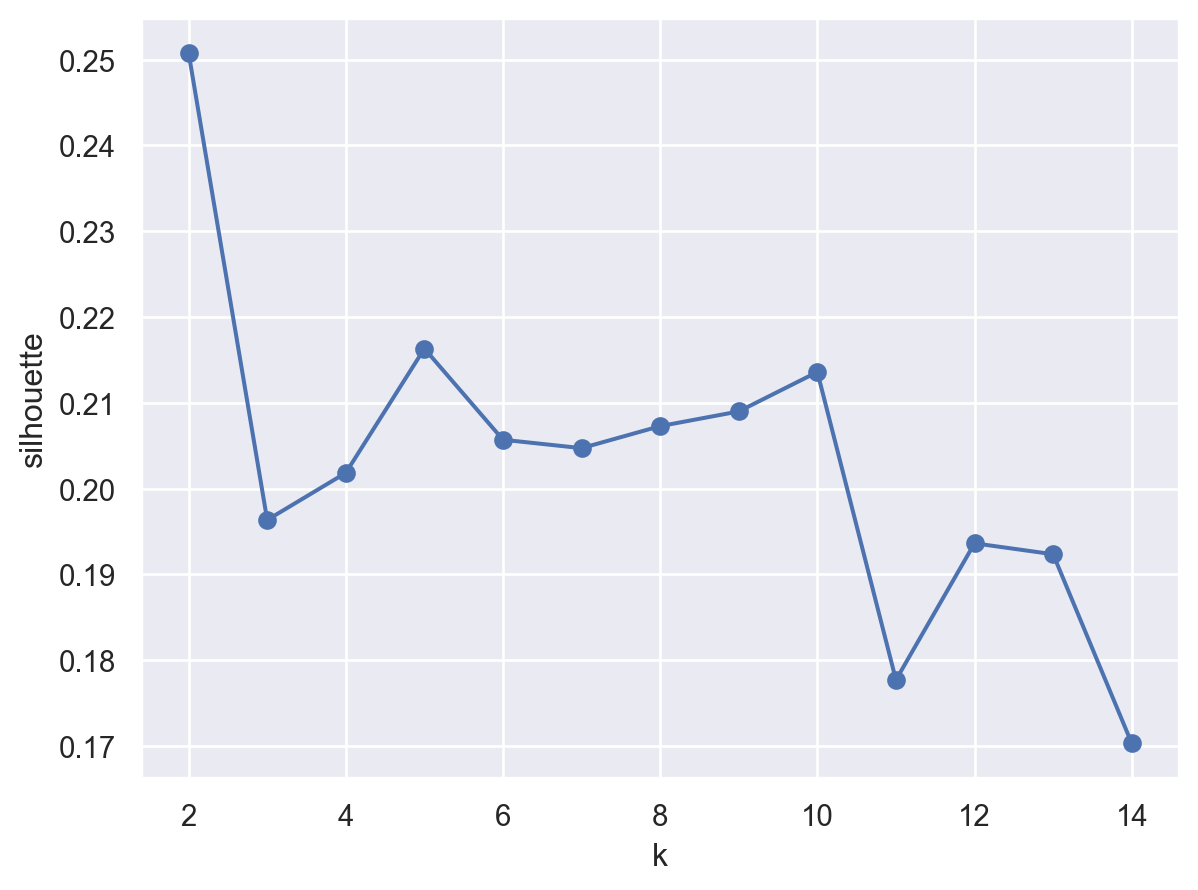

In [61]:
# Visualizing the "silhouette" results 
(
    
    pd.DataFrame(silhouette, columns=['k', 'silhouette'])    # Selecting the "highest value" of the silhouette to select K, here k=2 or 4
    .pipe(so.Plot, x='k', y='silhouette')
    .add(so.Line(marker='o'))
    
    
)

In [62]:
# Performing "Elbow Method" 
# ------------------------------------------------------------ #
inertia=[]  # Creating a Python list to save different values of inertia 
for k in range(1,15):
    kmeans=KMeans(n_clusters=k,n_init= 10, random_state=123) # For each iteration, we initiate a model that is called k-means
    kmeans.fit(X_scaled)  # Passing our data 
    inertia.append([k, kmeans.inertia_])  # Appending two items to the end of the original list 
    
inertia
# When increasing k, the inertia drops, which is the general trend

[[1, 852.0],
 [2, 658.4758326364258],
 [3, 566.5846195853483],
 [4, 502.9846244882334],
 [5, 449.1713121783637],
 [6, 403.06101310722534],
 [7, 365.4451121524804],
 [8, 343.928302631849],
 [9, 323.604228359014],
 [10, 305.2389364389806],
 [11, 293.35460006535067],
 [12, 280.15979383702927],
 [13, 261.06725865242595],
 [14, 251.46006830837905]]

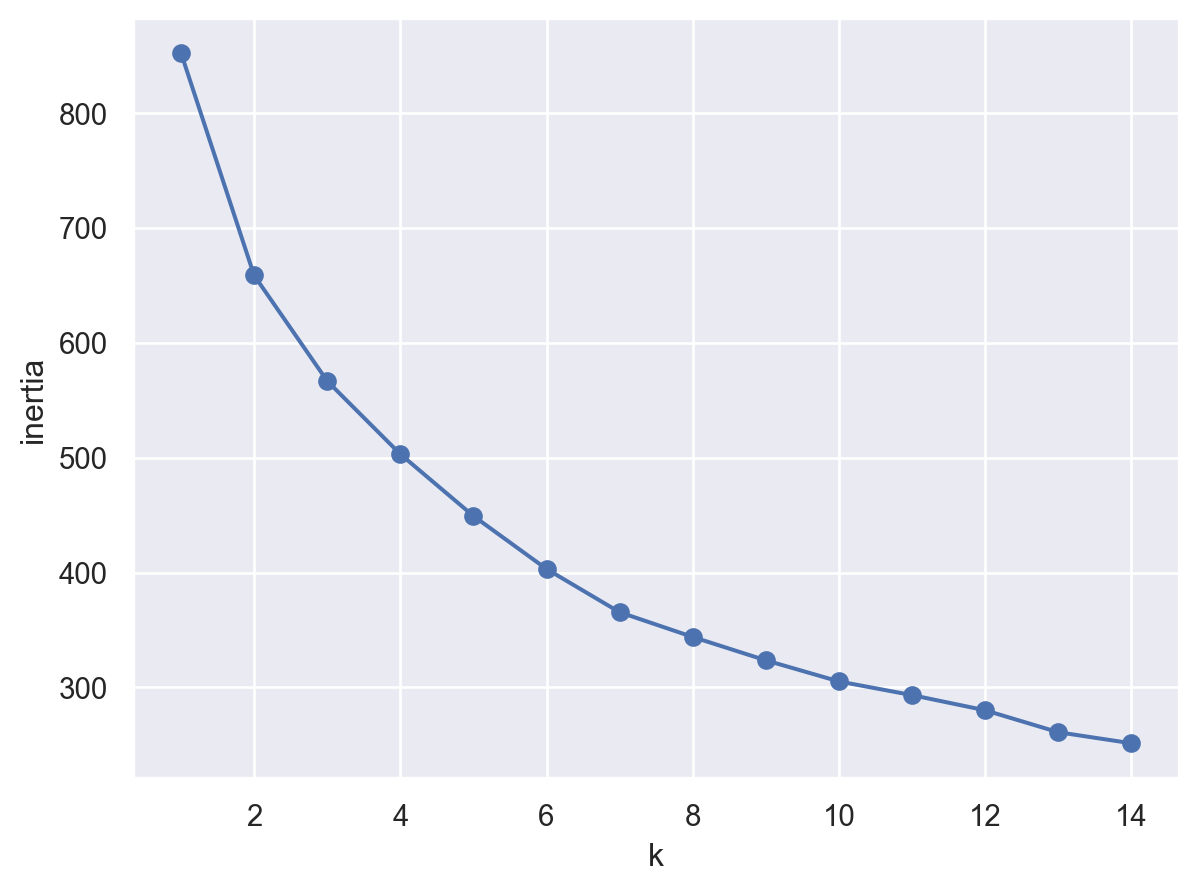

In [63]:
# Visualizing using the "Elbow Method" because this way, it would be easier to determine the optimal number of clusters 
(
     pd.DataFrame(inertia, columns=['k', 'inertia'])
    .pipe(so.Plot,  x='k', y='inertia' )   # Passing the data frame here 
    .add(so.Line(marker = 'o'))
)

In [64]:
# Based on the previous visuals, the optimal number of clusters is 2 using the "silhouette" score since it is associated with the highest score
# The optimal number of clusters is not that clear using the "Elbow Method", could be intpreted as 2
# For Next steps, we will be adopting the number of clusters to be 2 
# ------------------------------------------------------------ #
# Perform K-means clustering
k = 2 
kmeans = KMeans(n_clusters=k, n_init = 10)  # n_init: Number of times the k-means algorithm is run with different centroid seeds.
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_


In [65]:
# Understanding Cluster Characteristics
# ------------------------------------------------------------ #
# Transform the centroids back to the original scale
original_scale_centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Creating a data frame for these centroids 
centroids_df = pd.DataFrame(original_scale_centroids, columns=X.columns, index=['Cluster A', 'Cluster B'])

print(centroids_df)


                 age  bilirubin  alk_phosphate        sgot   albumin  \
Cluster A  47.454545   2.134756     130.013867  110.986494  3.292135   
Cluster B  36.862069   0.944961      90.127216   65.727094  4.166613   

             protime  
Cluster A  51.746524  
Cluster B  68.770115  


In [66]:
# Analyzing the relationship between clusters and class
cluster_class_distribution = df.groupby(['cluster', 'class']).size().unstack(fill_value=0)

print(cluster_class_distribution)

class    die  live
cluster           
0         23    32
1          4    83


**The clustering appears to have identified one cluster (Cluster 1) that is strongly associated with the 'live' class and another (Cluster 0) with a more mixed distribution.**

**This may indicate that the features used for clustering are good predictors for the likelihood of living, especially in identifying individuals who are more likely to live (as seen in Cluster 1).**


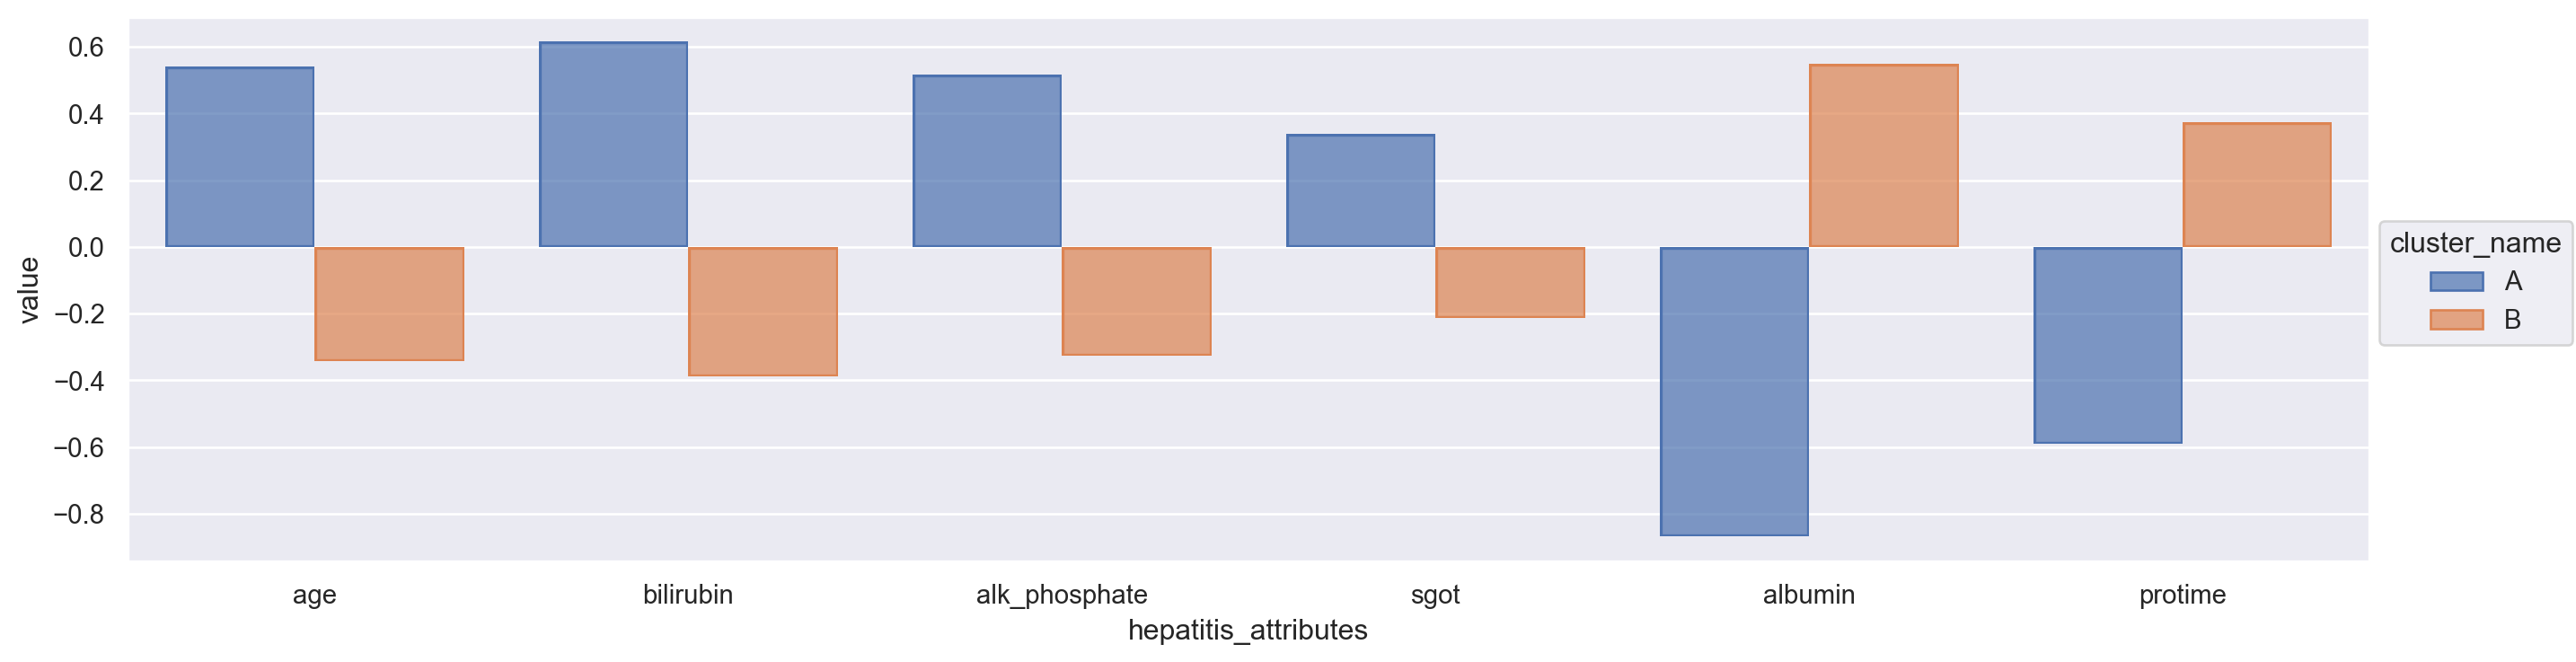

In [67]:
# Visualizing the clusters and their centroids 
(
    pd.DataFrame(kmeans.cluster_centers_, columns=X.columns, index=['A', 'B'])
    .rename_axis(index='cluster_name')  # Rename our axis 
    .reset_index()  # It is better to rest the index to be considered as a column in the data frame 
    .melt(id_vars='cluster_name', var_name='hepatitis_attributes')  # Melting the wide table into long table 
    .pipe(so.Plot,x='hepatitis_attributes', y='value', color='cluster_name')  # Colur the lines to be the cluster names 
          .add(so.Bar(), so.Dodge())  # Dodge is used to avoid overplotting 
    .layout(size=(14,4))  # To make the plot wider and easier to read 
    
)

## Dashboars

In [68]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
# ------------------------------------------------------------ #
# Numerical Data Dashboard
pred_num_col = [
    'age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime'
]



logit_model = sm.Logit(df['class_live'], sm.add_constant(df[pred_num_col]))
result = logit_model.fit()


app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Numerical Data - LR"),

    dcc.Dropdown(
        id='predictor-dropdown',
        options=[{'label': col, 'value': col} for col in pred_num_col],
        value='age',
        style={'width': '50%'}
    ),

    dcc.Graph(id='probability-plot'),
])

@app.callback(
    Output('probability-plot', 'figure'),
    [Input('predictor-dropdown', 'value')]
)
def update_plots(selected_predictor):
    prob_live = result.predict(sm.add_constant(df[pred_num_col]))
    df['prob_live'] = prob_live
    prob_die = 1 - prob_live
    df['prob_die'] = prob_die

    df['class_live_color'] = df['class_live'].map({1: 'live', 0: 'die'})
    probability_fig = px.scatter(
        df,
        x=selected_predictor,
        y='prob_live' if selected_predictor != 'sex_male' else 'prob_die',
        color='class_live_color',
        labels={'x': selected_predictor, 'y': 'Probability of Death'},
        title=f'Probability Plot: {selected_predictor} vs. class_live'
    )

    return probability_fig


if __name__ == '__main__':
    app.run_server(jupyter_mode = 'external', debug=True, port=8051)


Optimization terminated successfully.
         Current function value: 0.316442
         Iterations 7
Dash app running on http://127.0.0.1:8051/


In [69]:
# ------------------------------------------------------------ #
# Categorical Data Dashboard

pred_cat_cols = [
    'steroid_True', 'antivirals_True', 'fatigue_True', 'malaise_True', 'anorexia_True',
    'liver_big_True', 'liver_firm_True', 'spleen_palpable_True', 'spiders_True',
    'ascites_True', 'varices_True', 'histology_True', 'sex_male'
]


app = dash.Dash(__name__)  

app.layout = html.Div([
    html.H1("Categorical Data - LR"),

    dcc.Dropdown(
        id='feature-dropdown',
        options=[{'label': col, 'value': col} for col in pred_cat_cols],
        value='steroid_True',
        style={'width': '50%'}
    ),

    dcc.Graph(id='percentage-bar-chart'),
])

@app.callback(
    Output('percentage-bar-chart', 'figure'),
    [Input('feature-dropdown', 'value')]
)
def update_percentage_chart(selected_feature):
    try:
        if selected_feature not in df.columns:
            raise ValueError(f"Selected feature '{selected_feature}' not found in the data frame .")
        df['class_live_color'] = df['class_live'].map({1: 'live', 0: 'die'})
        percentage_df = df.groupby([selected_feature, 'class_live_color']).size().unstack(fill_value=0).reset_index()
        percentage_df['Total'] = percentage_df['die'] + percentage_df['live']
        percentage_df['Die_Percentage'] = (percentage_df['die'] / percentage_df['Total']) * 100
        percentage_df['Live_Percentage'] = (percentage_df['live'] / percentage_df['Total']) * 100

        fig = px.bar(
            percentage_df,
            x=selected_feature,
            y=['Live_Percentage', 'Die_Percentage'],
            labels={'variable': 'Percentage', 'value': 'Percentage of live and die'},
            title=f'Percentage of People who Die and Live with Respect to {selected_feature}',
            barmode='stack'
        )

        return fig
    except Exception as e:
        print(f"Error: {str(e)}")
        return px.bar()

if __name__ == '__main__': 
    app.run_server(jupyter_mode = 'external', debug=True, port = 8052)


Dash app running on http://127.0.0.1:8052/


## Deploying The Dashboards 
The two dashboards were successfully deployed

[IMSE586 Project Dashboard 1](https://imse586-project-dash-1-ut5m.onrender.com/)

[IMSE586 Project Dashboard 2](https://imse586-project-dash-2.onrender.com)


In [70]:
# Note: These dashboards need time to run, but they will run eventually!